In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE 

#                                        Business Problem Understanding and Problem definition

**Problem Statement**
                                          
An E Commerce company or DTH provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

**Need of the project**

A  predictive model is needed which estimates at the level of individual whether they will leave. Technically it is a classification model which divide into two groups, churn or not churn.  By knowing which group of customers are leaving, it will be easy to the company to set efforts to retain them. The main need of project is the supervised data having a responsive target. Based on the training data, the model learns to best capture the relationship between features and target. Basically, it needs historical data where a customer already left and not left. And the data should have demographic information, transaction information, interaction between company and customer information, revenue, span of a customer in service etc. 

**Understanding Business/Social oppertunity**

We are assigned to develop a churn prediction model for this company and provide business recommendations on the campaign. The campaign suggestion should be unique and be very clear on the campaign offer because our recommendation will go through the revenue assurance team. Company is highly dependent on data, which underscores the importance of collecting it. Accurate data collection is necessary to make informed business decisions, ensure quality assurance, and keep research integrity. The churn prediction gives opportunity to company understand more about their service or product quality to improve so that they can attract more customers. It also tells how high the risk is of losing them. E-commerce businesses try to keep the churn rate at a minimum as it is significantly easier, and less costly, to retain customers, than it is to attract new ones.  The study says, monthly churn rate should not cross more than 5%, the smaller the rate the better is for company and every company tries to keep churning rate of 2-3%-5%.

# Data Report

In [3]:
df=pd.read_excel('Customer Churn Data.xlsx')

**Understanding how data was collected in terms of time, frequency and methodology**

Data collection has happened in multiple ways such as Phone Survey, Mobile Survey, Internet, In-Person Survey.

•	Keeping track of an account, when was opened and when account was closed. That’s how the information captured in attribute “Tenure”.

•	How many times customers has ordered using which device (Mobile or Laptop), through which device customer has provided the feedback.

•	Via phone call tracking, How many times customer has called to the Customer care number and for which reason), the frequency and no of times complain can be noted here.

•	When a customer do payment, it always asks which is the preferred payment method, so It has tracked by monitoring the particular customer has made payment from which method more often.

•	When a customer open a new account, it asks few basic question like marital status, phone number, email id, male/female. So, here the personal information was captured by the company.

•	When a customer order something customer spend money to the company, so how many times he has paid and how much revenue has generated is also a data to capture.

•	From the customer's payment history by making a total payment month wise, a segmentation was done, like highly paid or low paid customer.

•	Data collection is a continuous process and frequency to collect data is automated based on the customer’s activity. As per the dataset here mostly, 12 months of data was taken to analyze.


**Visual Inspection of data**

In [4]:
df.head() 

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [112]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [113]:
df.shape

(11260, 19)

**Data Set stats**

In [114]:
df.describe(include='all').T

count unique         top  freq      mean       std  \
AccountID                11260    NaN         NaN   NaN   25629.5   3250.63   
Churn                    11260    NaN         NaN   NaN  0.168384  0.374223   
Tenure                   11158     38           1  1351       NaN       NaN   
City_Tier                11148    NaN         NaN   NaN   1.65393  0.915015   
CC_Contacted_LY          11158    NaN         NaN   NaN   17.8671   8.85327   
Payment                  11151      5  Debit Card  4587       NaN       NaN   
Gender                   11152      4        Male  6328       NaN       NaN   
Service_Score            11162    NaN         NaN   NaN   2.90253  0.725584   
Account_user_count       11148      7           4  4569       NaN       NaN   
account_segment          11163      7       Super  4062       NaN       NaN   
CC_Agent_Score           11144    NaN         NaN   NaN   3.06649   1.37977   
Marital_Status           11048      3     Married  5860       NaN       NaN   
rev_per_month            11158     59           3  1746       NaN       NaN   
Complain_ly              10903    NaN         NaN   NaN  0.285334  0.451594   
rev_growth_yoy           11260     20          14  1524       NaN       NaN   
coupon_used_for_payment  11260     20           1  4373       NaN       NaN   
Day_Since_CC_connect     10903     24           3  1816       NaN       NaN   
cashback                 10789   5693      155.62    10       NaN       NaN   
Login_device             11039      3      Mobile  7482       NaN       NaN   

                           min      25%      50%      75%    max  
AccountID                20000  22814.8  25629.5  28444.2  31259  
Churn                        0        0        0        0      1  
Tenure                     NaN      NaN      NaN      NaN    NaN  
City_Tier                    1        1        1        3      3  
CC_Contacted_LY              4       11       16       23    132  
Payment                    NaN      NaN      NaN      NaN    NaN  
Gender                     NaN      NaN      NaN      NaN    NaN  
Service_Score                0        2        3        3      5  
Account_user_count         NaN      NaN      NaN      NaN    NaN  
account_segment            NaN      NaN      NaN      NaN    NaN  
CC_Agent_Score               1        2        3        4      5  
Marital_Status             NaN      NaN      NaN      NaN    NaN  
rev_per_month              NaN      NaN      NaN      NaN    NaN  
Complain_ly                  0        0        0        1      1  
rev_growth_yoy             NaN      NaN      NaN      NaN    NaN  
coupon_used_for_payment    NaN      NaN      NaN      NaN    NaN  
Day_Since_CC_connect       NaN      NaN      NaN      NaN    NaN  
cashback                   NaN      NaN      NaN      NaN    NaN  
Login_device               NaN      NaN      NaN      NaN    NaN

In [115]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

**Understanding of attributes: Data Dictionary**

Variable and Description

AccountID	> account unique identifier

Churn	> account churn flag (Target)

Tenure	> Tenure of account

City_Tier > Tier of primary customer's city

CC_Contacted_L12m	> How many times all the customers of the account has contacted customer care in last 12months

Payment	> Preferred Payment mode of the customers in the account

Gender	> Gender of the primary customer of the account

Service_Score	> Satisfaction score given by customers of the account on service provided by company

Account_user_count	> Number of customers tagged with this account

account_segment	> Account segmentation on the basis of spend

CC_Agent_Score	> Satisfaction score given by customers of the account on customer care service provided by company

Marital_Status	> Marital status of the primary customer of the account

rev_per_month	> Monthly average revenue generated by account in last 12 months

Complain_l12m	> Any complaints has been raised by account in last 12 months

rev_growth_yoy	> revenue growth percentage of the account (last 12 months vs last 24 to 13 month)

coupon_used_l12m	> How many times customers have used coupons to do the payment in last 12 months

Day_Since_CC_connect	> Number of days since no customers in the account has contacted the customer care

cashback_l12m	> Monthly average cashback generated by account in last 12 months

Login_device	> Preferred login device of the customers in the account


In [62]:
df.shape

(11260, 19)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

**Summary**

•	AccountId will not be having any impact on the model building, need to remove.

•	Churn is the target attribute, it has values like 0 and 1. (0 means "False" which states customer is not churning, 1 means "True" which states that customer is churning)

•	Total 11260 rows and 19 columns are present.

•	Data is more spread out for Churn and complain_Ly because standard deviation is more than the mean.

•	For all other columns standard deviation is less than the mean, so more numbers are around the average value.

•	As per the min and max, it seems like there is presence of outlier.

•	There is Null values present, and no duplicate data, because AccountId is unique. Once we delete the AccountID we may see duplicate data.

•	The data contains customer demographic information, monetary information such as revenue, cashback, segmentation info based on spending, service span, users info per account etc.

•	More data pattern we will discover in EDA.


# Exploratory Data Analysis

**Unwanted column removal**

In [4]:
df.drop('AccountID',axis=1,inplace=True) 

In [5]:
df.duplicated().sum()

259

**Uni-Variate Analysis using original dataset**

**Unique Values Check**

In [5]:
for variable in df.columns:
    print("Variable Name: ",variable)
    print(df[variable].unique())
    print("\n")

Variable Name:  Churn
[1 0]


Variable Name:  Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


Variable Name:  City_Tier
[ 3.  1. nan  2.]


Variable Name:  CC_Contacted_LY
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]


Variable Name:  Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Variable Name:  Gender
['Female' 'Male' 'F' nan 'M']


Variable Name:  Service_Score
[ 3.  2.  1. nan  0.  4.  5.]


Variable Name:  Account_user_count
[3 4 nan 5 2 '@' 1 6]


Variable Name:  account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


Variable Name:  CC_Agent_Score
[ 2.  3.  5.  4. nan  1.]


Variable Name:  Marital_Status
['Single' 'Divorced' 'Married' nan]


Variable 


•	From the above unique values we can notice the variables which are actually categorical attributes like Complain_Ly, CC_Agent_Score, Service_Score and City_Tier (These are scores from low to high and categorically labeled), however their datatype is not Object as per the dataset, which is incorrect.

•	Also there are some variables like Tenure, Rev_per_month, rev_per_yoy, coupon_used_for_payment and Day_Since_CC_connect are actually some counts and no of count of something cannot be a categorical variable, because these are not labeled, However, as per the dataset, these datatypes are object, which is incorrect.

•	There are anomalies like "&&&&","@", "#","*","$","+" ,"nan"  are present in the dataset which are some missing values.
•	The variables which are actually categorical but datatype is numeric, the variable which are numeric but datatype is object, we will convert to actual datatype.

•	Gender variable is Having values like "Male", "M", "Female", "F". So we will make M and Male as one, Female and F as one value now to have a better plot visual.

•	In Account Segment variable, there are values like Regular Plus and Regular +, Super Plus and Super + which meaning seem to be same. So here we have made as single value to Regular plus and regular +, Super plus and Super +. By considering Plus and + as same.


**Variable Transformation For Gender, Account_segment**

In [6]:
df['Gender'].replace("M","Male",inplace=True)
df['Gender'].replace("F","Female",inplace=True)

In [7]:
df['account_segment'].replace('Regular +','Regular Plus', inplace=True)
df['account_segment'].replace('Super +','Super Plus', inplace=True)

**Junk data / Missing Value Treatment**

 All the junk data will fist convert to Null values and then we will treat

In [8]:
df['Login_device']=df['Login_device'].replace('&&&&',np.nan)

In [9]:
lis= ['Churn','City_Tier','Service_Score','CC_Agent_Score','Complain_ly','Tenure','Account_user_count','rev_per_month',
              'rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']

for column in lis:
    df[column] = df[column].replace(('@', '#','*','$','+','nan'),np.nan)

In [10]:
na_values=df.isnull().sum()
na_values[na_values.values > 0].sort_values(ascending=False)

rev_per_month              791
Login_device               760
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Tenure                     218
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Service_Score               98
account_segment             97
rev_growth_yoy               3
coupon_used_for_payment      3
dtype: int64

**Check what is the percentage of missing value. If more than 40%, we will drop the field, if less then 10% then for numeric values will treat with median and for charcter values we will treat with Mode, if in between 10 to 40, will replace with any logical value** 

In [11]:
for column in df:
    print("percentage of missing value for", column, "is: ",round((df[column].isnull().sum() / df[column].count()) * 100),"%")

percentage of missing value for Churn is:  0 %
percentage of missing value for Tenure is:  2 %
percentage of missing value for City_Tier is:  1 %
percentage of missing value for CC_Contacted_LY is:  1 %
percentage of missing value for Payment is:  1 %
percentage of missing value for Gender is:  1 %
percentage of missing value for Service_Score is:  1 %
percentage of missing value for Account_user_count is:  4 %
percentage of missing value for account_segment is:  1 %
percentage of missing value for CC_Agent_Score is:  1 %
percentage of missing value for Marital_Status is:  2 %
percentage of missing value for rev_per_month is:  8 %
percentage of missing value for Complain_ly is:  3 %
percentage of missing value for rev_growth_yoy is:  0 %
percentage of missing value for coupon_used_for_payment is:  0 %
percentage of missing value for Day_Since_CC_connect is:  3 %
percentage of missing value for cashback is:  4 %
percentage of missing value for Login_device is:  7 %


**Here missing values are less then 10%, so will convert to median and mode**

In [12]:
cateogry_columns=df.select_dtypes(exclude=['int64','float64']).columns.tolist() 
integer_columns=df.select_dtypes(exclude=('object')).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

**Final Check**

In [13]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

**Data Type Conversion**

•	After missing value treatment, all the non-labeled/non-descriptive and continuous variables having object datatypes are now automatically converted to Int/Float as we removed junk data.

•	The variables having labels which are actually categorical in nature but having datatype as float/Int, we will convert to object datatype so that it can be a correct distinguishing. but the value will remain same as numbers, because these are scores or (1,0) or some orderings (such as 1,2,3). Because any variable which is labeled is a categorical variable. Even if these are numbers but as labeled so, we cannot use directly, therefore, we need to encode after EDA.

•	Some values which should be Integer and not float such as number of years, count of something, anything related to revenue should not be float. so will make them Int64.


In [14]:
num = ['Tenure', 'Account_user_count','rev_per_month','rev_growth_yoy','Day_Since_CC_connect',
       'CC_Contacted_LY','coupon_used_for_payment']

for variable in num:
    df[variable] = df[variable].astype('int64')
    
categorical= ['Service_Score','CC_Agent_Score','Complain_ly','City_Tier']

for column in categorical:
    df[column] = df[column].astype(str)

**Final Variable Info**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  int64  
 2   City_Tier                11260 non-null  object 
 3   CC_Contacted_LY          11260 non-null  int64  
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  object 
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  object 
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  int64  
 12  Complain_ly              11260 non-null  object 
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

•	All variables are now having similar raw count after missing value treatment and the datatypes are also corrected( Labeled variables have object datatypes and non-labeled variables have Integer datatype).

**Uni-Variate Analysis**

**Churn Distribution**

0    9364
1    1896
Name: Churn, dtype: int64

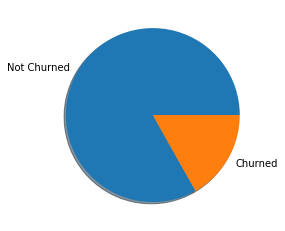

In [16]:
plt.pie(df['Churn'].value_counts(),labels=['Not Churned','Churned'],shadow=True);
df['Churn'].value_counts()

In [17]:
(1896 / df['Churn'].count()) * 100 

16.838365896980463

**Check count of each observation in a variable to understand more frequently used entity:**

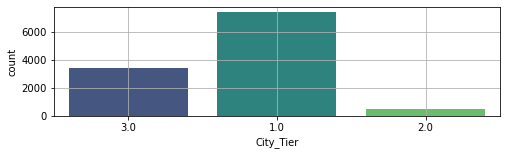

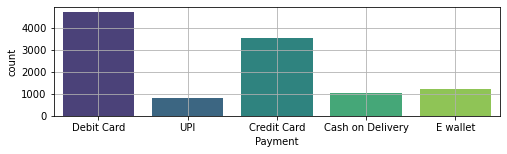

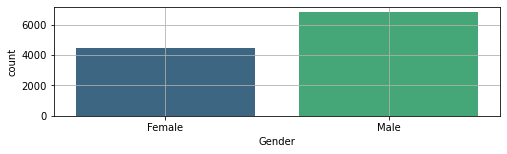

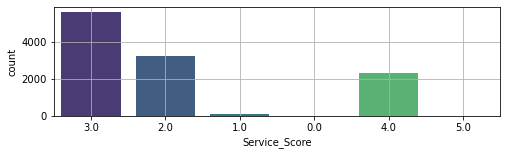

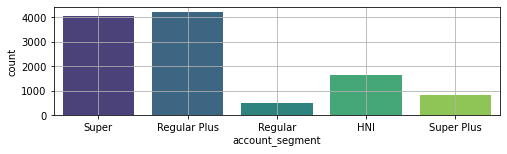

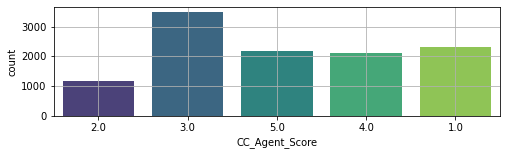

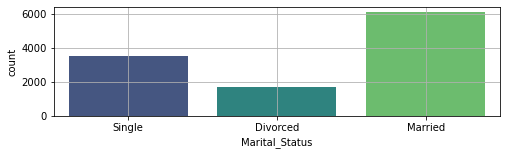

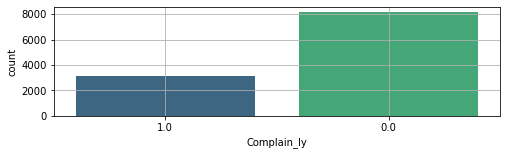

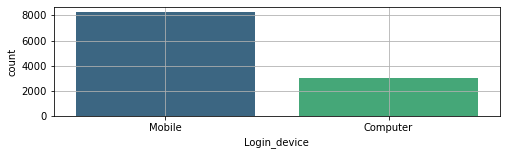

In [18]:
#column_list=[df['Payment'],df['Gender'],df['account_segment'],df['Marital_Status'],df['Login_device'],df['Tenure'],df['Account_user_count']
          # ,df['coupon_used_for_payment'],df['rev_growth_yoy'],df['Day_Since_CC_connect']]

for column in df.select_dtypes(exclude=['int64','Float64']):
    f,ax=plt.subplots(figsize=(8,2))
    ax=sns.countplot(x=df[column],palette="viridis")
    plt.grid()

•	There are multiple payment methods such as Debit Card, UPI, Credit Card, Cash on delivery, E wallet.The most preferred payment method is Debit card and least use method is UPI.

•   More number of customers are present from Tier-1 cities.

•  Both company service and customer care services are given by customers the rating as 3.

•	In the data set, more numbers of customer belong to “Male” category.

•	Data is grouped by different segmentation based on the spent such as Super, Regular plus, Regular, Super Plus and HNI. It seems more customers belong to 	“Regular Plus” and “Super”. The least customer belong to “Regular” category.

•	Marital status divided into 3 categories (Married, Unmarried and Divorced). More number of customers belong to Married category.
•  Number of customer who have not complained are more in comapred to who ahve complained.
•	Most of the people’s preferable device is “Mobile”.


**Count plots for attributes having numeric data types**

In [20]:
df_num=df.select_dtypes(exclude='object').drop(['cashback','rev_per_month','CC_Contacted_LY','Churn'],axis=1)

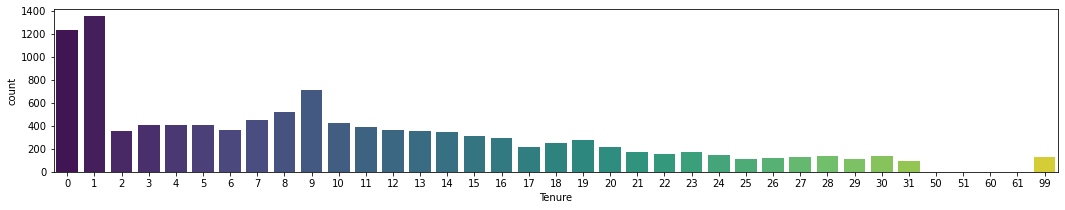

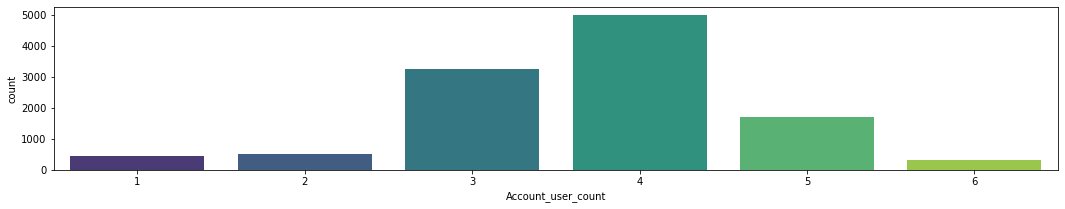

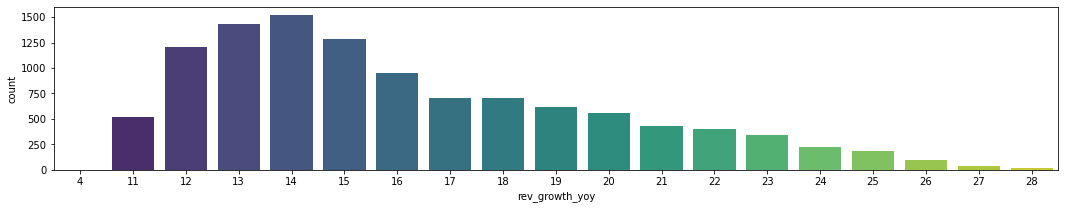

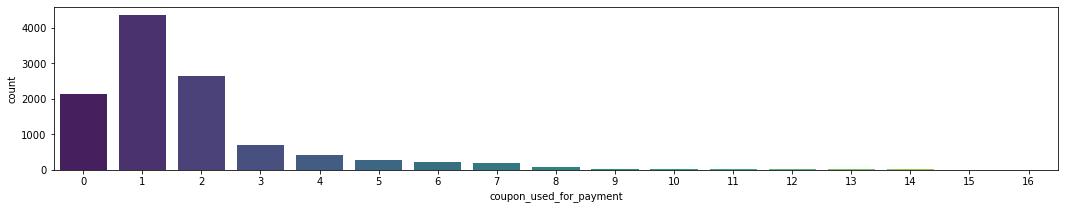

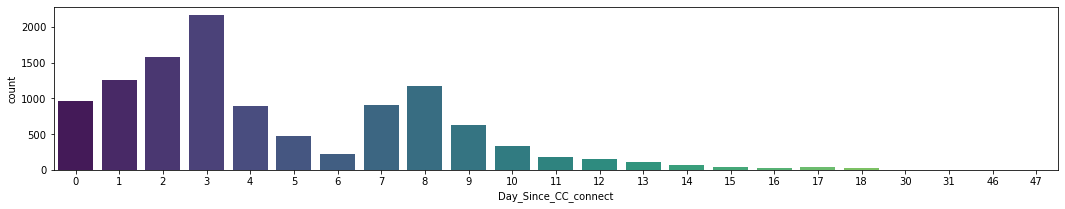

In [21]:
for column in df_num:
    f, ax=plt.subplots(figsize=(18,3))
    ax = sns.countplot(x=df_num[column],data=df_num,palette="viridis") 

•	More number of customers belong to 0-1 year category. There are some customers who are for 30-31 years, seems to be important customers. If we notice few-customers belong to 99 years which seems like an anomaly, need to check with business in this type of case.

•	Multiple customers are associated with one account, most of the account is having 4 customers, these accounts are again very important accounts, because if company will lose one account then they are actually losing 4-5 customers.

•	More number of customers have used coupon for one time.

•	Maximum is 3 days since when number of customers contacted any customer-care services.

**Stripplot to check distribution of data points in each variable**

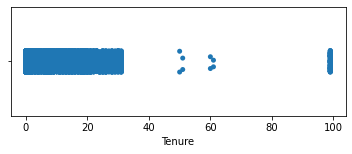

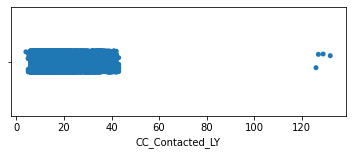

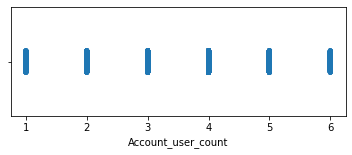

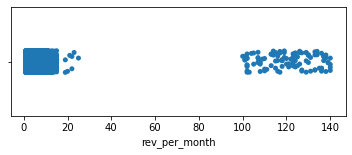

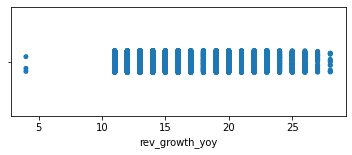

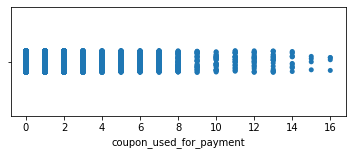

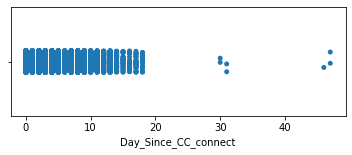

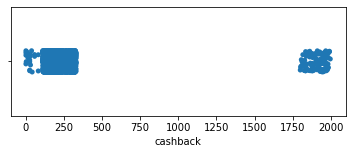

In [22]:
for i in df.select_dtypes(exclude='object').drop('Churn',axis=1):
    f, ax = plt.subplots(figsize=(6,2))
    ax = sns.stripplot(x=df[i])

•	From the strip plot we can easily see how each variable is distributed.

•	Tenure is distributed into 3 parts. 0-35 years, 45-60 years and above 90. 0-35 years customer numbers are more.

•	Rev growth per 12 months is divided by two parts, for some customers revenue is less than 5% whereas most of the having more than 10%.

•	Customer contact is divided by two parts, approximately 40 times or else more than 120 times.

•	Rev_per_month is in good shape because most of the customers are having more than 100% of revenue per month.

•	Cashback is again segmented by two groups, 0-250 and more then 1750.

•	By looking into the data, surely there are outliers present.


**Box Plots to understand outliers**

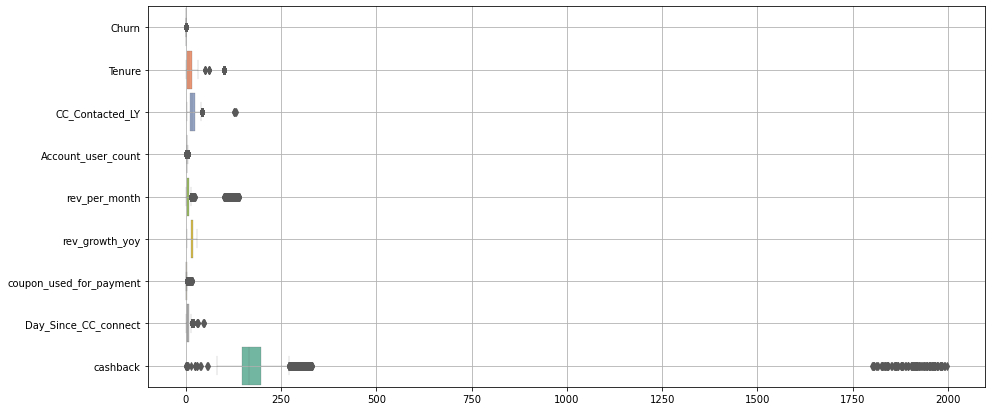

In [24]:
f,ax=plt.subplots(figsize=(15,7))
ax=sns.boxplot(data=df,linewidth=0.2,width=0.9,palette="Set2",orient='h')
plt.grid()

**Outlier is present in almost all the variables. Highest outliers present in cashback. We will treate these during outlier treatment in end of EDA**

**Distribution Plot**

In [47]:
#df.drop('Churn',axis=1).hist(figsize=(10,5),bins=7,color='green');
#plt.tight_layout()

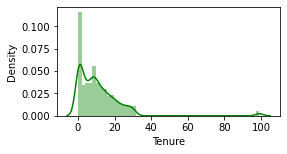

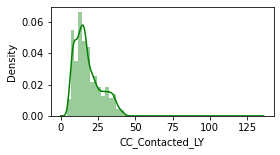

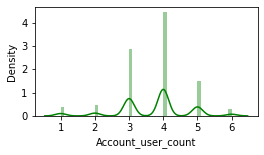

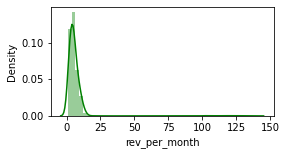

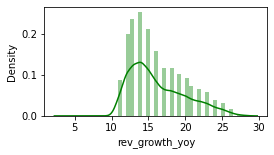

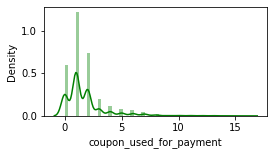

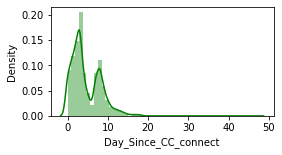

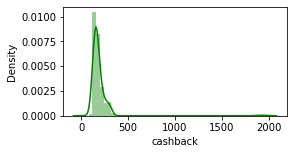

In [25]:
for i in df.select_dtypes(exclude='object').drop('Churn',axis=1):
    f, ax = plt.subplots(figsize=(4,2))
    ax = sns.distplot(df[i],color='green');

•	There is no variable which is normally distributed.

•	Variations are not extremely spread out except cashback which has up to 2000 data points are spread out.

•	Tenure, CC_Contacted_LY, rev_per_month, Day_Since_CC_connect, Coupon_used_for_payment and cashback all are left skewed. Rev_growth_yoy kind of a little right skewed.


**Multi-Variate Analysis**

<Figure size 360x216 with 0 Axes>

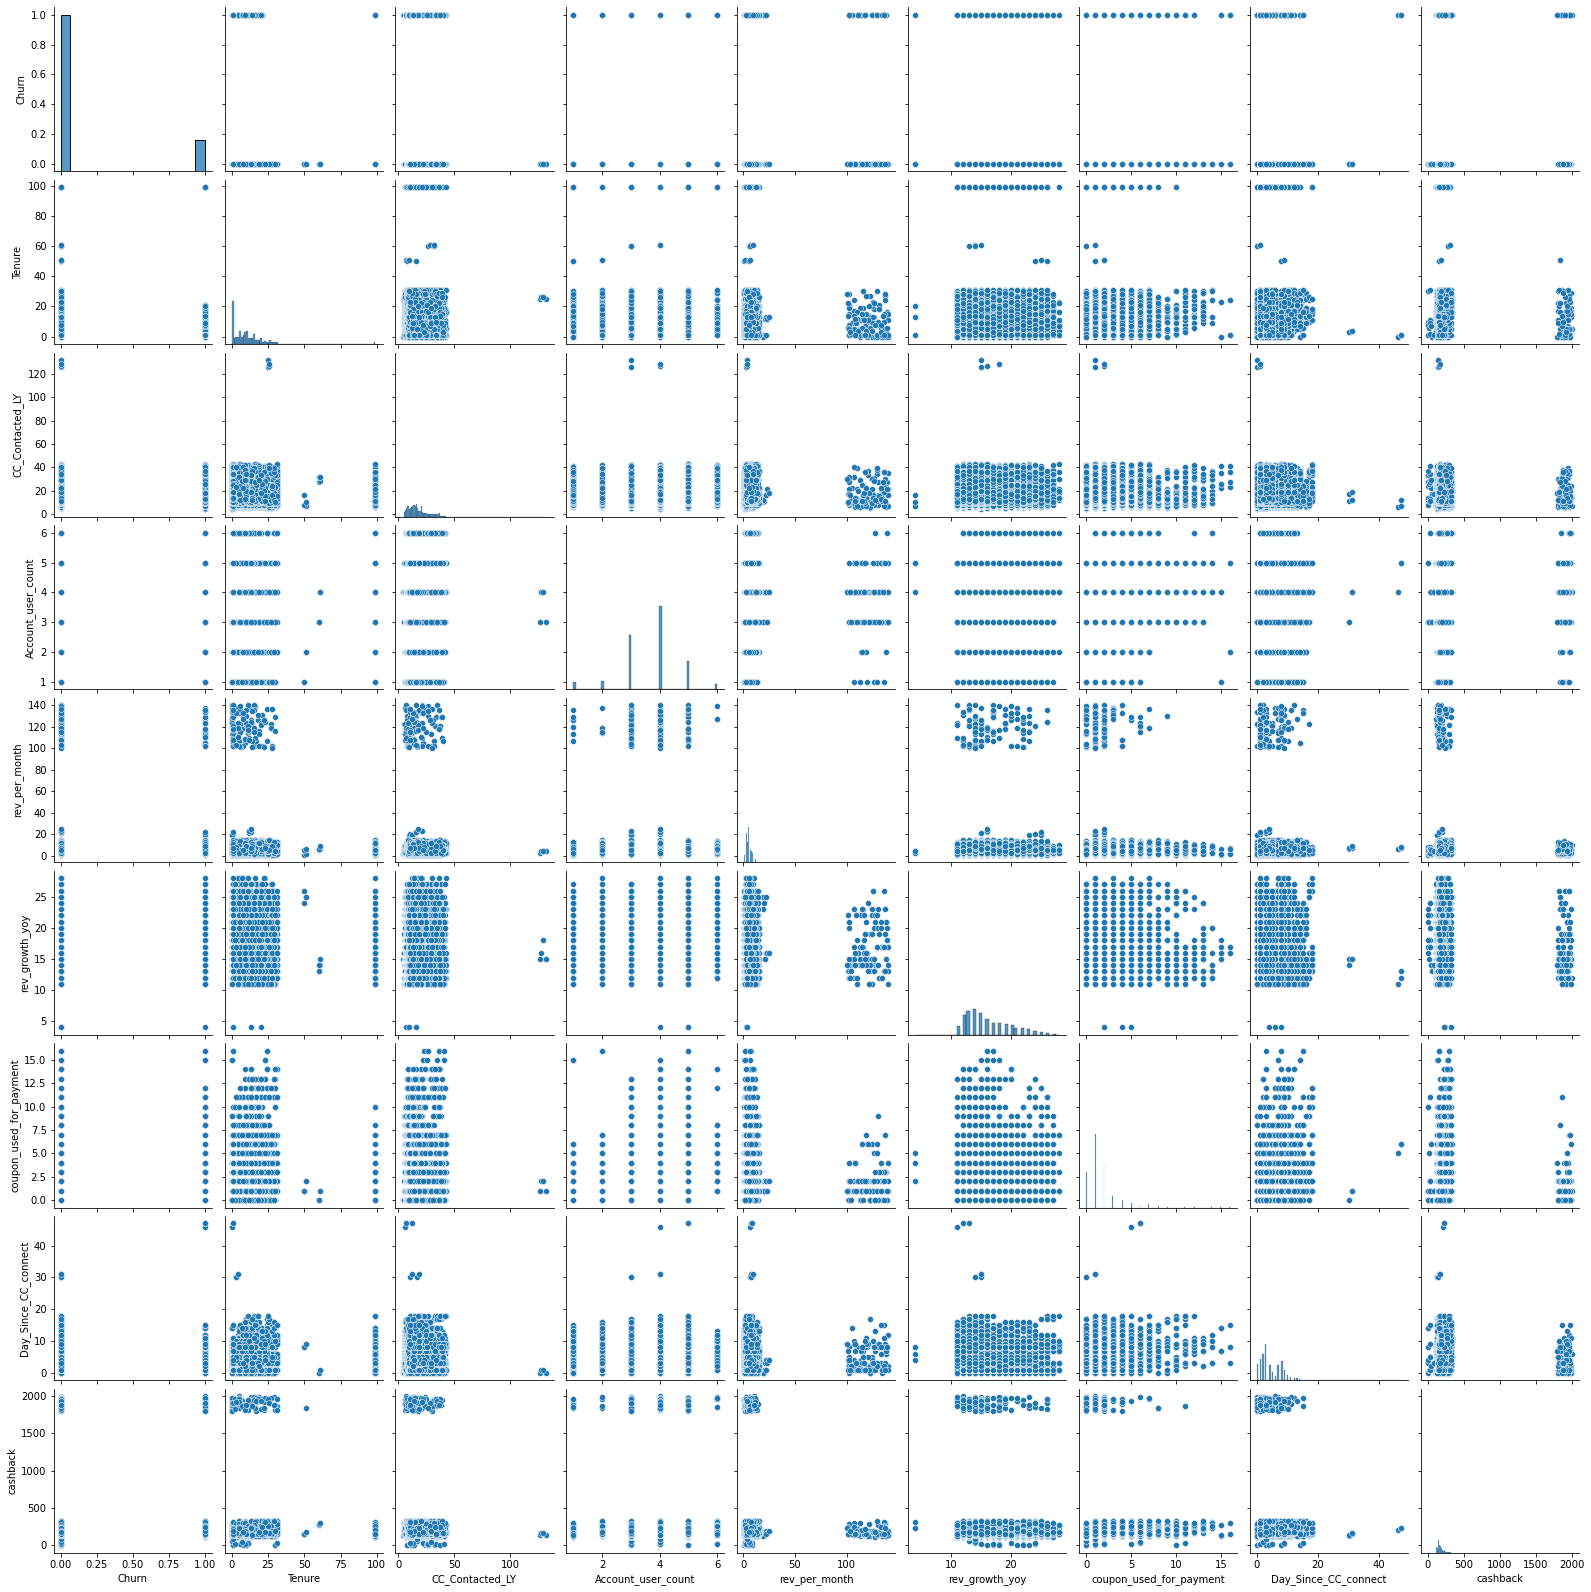

In [23]:
plt.figure(figsize=(5,3))
sns.pairplot(data=df,palette="cubehelix",diag_kind='hist');

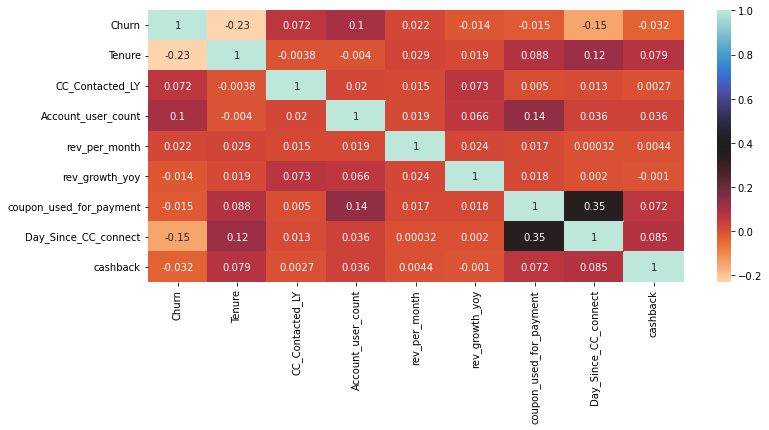

In [24]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='icefire_r');

•	There is no multicollinearity in the dataset.

•	The correlations between variables are very weak.

•	There are both positive and negative correlations present.

•	Basically do not see relationship between variables except these. For Coupon_used_for_payment and Day_Since_CC_connect we see 35% correlation present. 14% correlation present in between account_user_count and coupn_used_for_payment.Churn and Tenure having negative correlation of 23%, Day since cc connect and tenure having 12% correlation present, account user count and churn having 10% correlation. All Others are very very low.


                                              ****Bi-Variate Analysis****

  **Check each categorical variables against target variable "Churn", to understand which category churned more, which is churned less.**

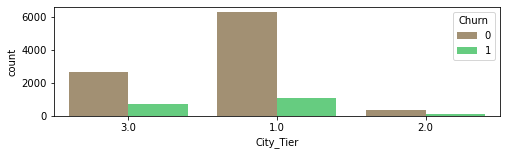

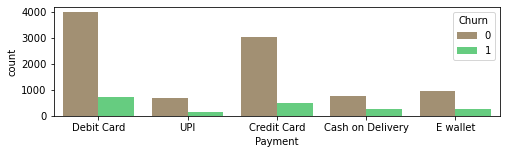

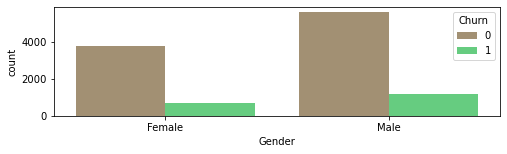

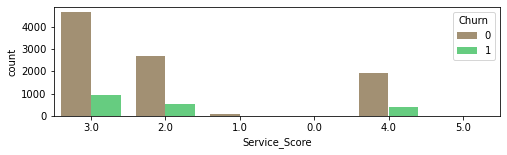

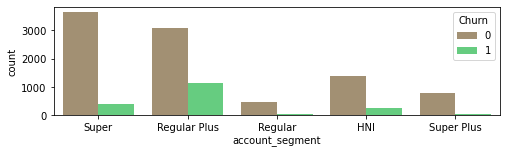

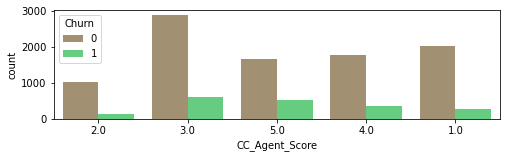

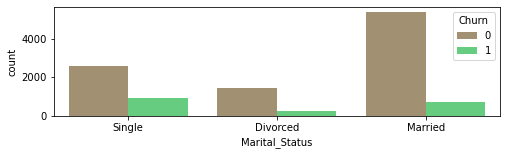

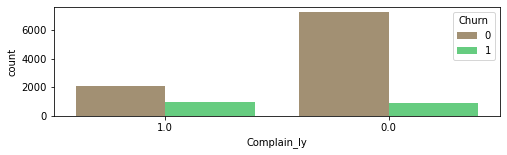

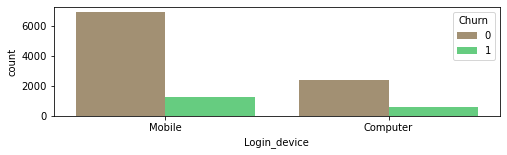

In [26]:

for i in df.select_dtypes(exclude=['int64','Float64']):
    fig, ax = plt.subplots(figsize=(8, 2) )
    sns.countplot(x=i,hue='Churn',data=df,palette='terrain_r')


•	In all 3 types of city, not churned customers are more, especially in Tire-1 City not churned count is more as well as churned customers.

•	More number of customers who are churned used Debit card, even customers who are not churned preferred to use Debit card, so does not seem to be a very important variable to analyze.

•	More churned customers belong to Male category as well as not churned customers, so not a important variable to analyze.
•	Customers who are churned or not, highest number of score goes to 3.

•	When it comes to Customer segment based on spent, Regular plus grouped customers have churned more, where as "Super" group customers are having highest not churned customers. Seems to be an important field to analyze.

•	Most of the customers who are not churned are married whereas churned customers are more in Singles, seems to be an important variable to analyze.

•	Customers who have not complained, seems like not churned count is more.

•	Churned/Not Churned both use mobile device more, so not an important field for analysis.


**Check each numeric variable against target variable(Churn) to analyze distribution of churn and non-churn category using histogram against each variable.**

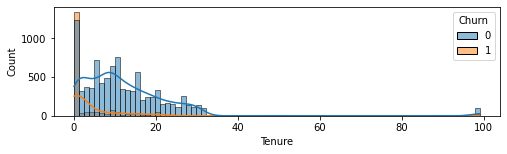

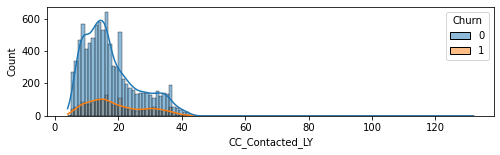

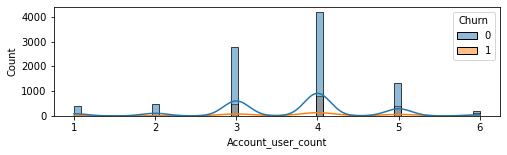

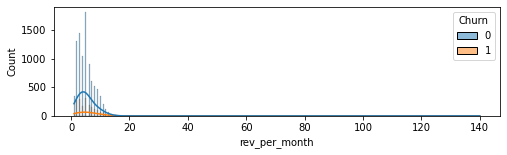

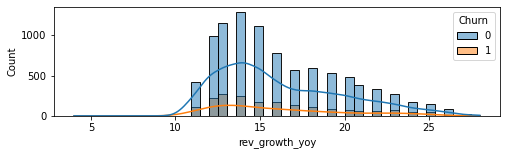

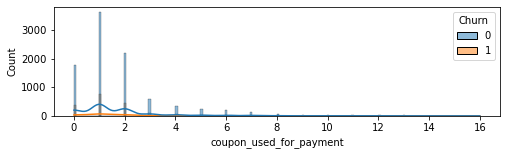

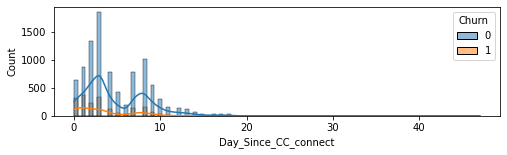

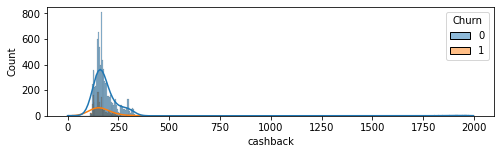

In [27]:
df_num=df.select_dtypes(exclude='object').drop('Churn',axis=1)

for column in df_num:
    f, ax=plt.subplots(figsize=(8,2))
    ax =sns.histplot(data=df_num,x=df_num[column],hue=df['Churn'],kde=True)

In [53]:
#for i in df.select_dtypes(exclude='object').drop(['Churn','cashback','rev_per_month','CC_Contacted_LY'],axis=1):
    #fig, ax = plt.subplots(figsize=(10, 2) )
    #sns.countplot(x=i,hue='Churn',data=df,palette='terrain_r')  

•	Churned/Not Churned all customers are more belong in between 0-1 years of tenure. So, this is an important year to keep track, because in between this year losing or getting new customer activities are happening. 

•	More revenue is definitely from not churned customers, because churned customers have less spent on company as they are leaving mostly in first year itself.

•	Having 4 customers in one account have more number of churned customers.

•	Coupon used for payment and days since cc connect there is not much thing to infer.



**We see data is not at all related, so we are avoiding to do scatter Plot between variables**

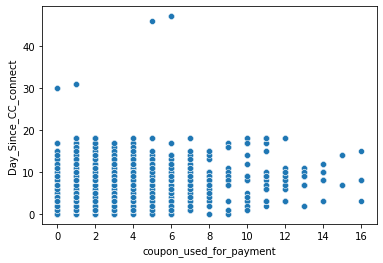

In [28]:
sns.scatterplot(x=df['coupon_used_for_payment'],y=df['Day_Since_CC_connect']);

**Outlier Treatment**

We have done outlier treatment by calculating Q3, Q1, IQR and lower /upper range.

Any outlier less then lower range replaced with lower range and any outlier more upper range replace with upper range value.

In [16]:
def outlier(column):
    sorted(column)
    Q1,Q3 = np.percentile(column,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [17]:
for attribute in df[['cashback','Day_Since_CC_connect','Tenure','CC_Contacted_LY','Account_user_count','rev_per_month','coupon_used_for_payment']]:
    lr,ur=outlier(df[attribute])
    df[attribute]=np.where(df[attribute]>ur,ur,df[attribute])
    df[attribute]=np.where(df[attribute]<lr,lr,df[attribute])

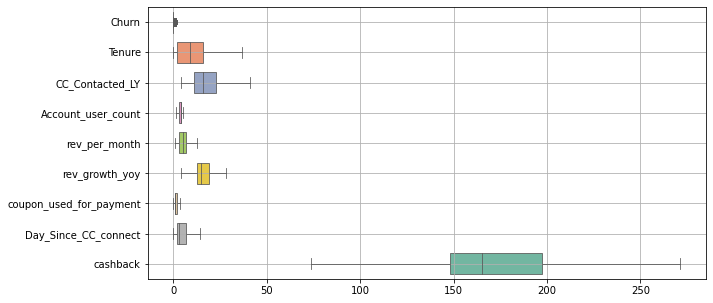

In [18]:
f,ax=plt.subplots(figsize=(10,5))
ax=sns.boxplot(data=df,linewidth=0.8,width=0.7,palette="Set2",orient='h')
plt.grid()

Outliers are removed now, so we will go with data encoding.

**Data Encoding**

We will go with both one-hot encoding and label encoding.

One-Hot Encoding is to get better model result. Because in Label encoding, since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order if there is no relationship between the values, 0 < 1 <2. For an example in label encoding, it will assign numbers based on alphabatical ordering, which might confuse our model into thinking that a column has data with some kind of order or hierarchy when the assigned encoded numbers are clearly not based on actual data order. To avoid this, we ‘OneHotEncode’ that column. For exmaple, variables like 'account_segment','Payment','Marital_Status'. In account_segment , orders matter because these are segmented based on spent(high spent, low spent). In label encoding it will assign numbers based on alphabatical and not based on actual order. So, clearly machine will misguided with the orders. And same for Pyment and Marita status, here order does not matter but through label encoding the type of numbers it will assign, machine will think some kind of order. Which is not good for model building.

Label Encoding: Columns like agent score,service _score,city_tire are already ordered with numbers, so if we do label encoding, it will encode correctly as per the actual score. For example: If value is 1, label encoding will assign as 0 and if value is 2, it will assign as 1. So in both the case 0<1<2. So it will maintain the actual order even after encoding.

Complain_ly, Gender and Login device are having only two values each, so in this case we can perform both labelencoding and one-hot. But to avoid too many featore establishment we will go with label encoding.

In [19]:
df_final=df.copy()

Categories=['Service_Score','CC_Agent_Score','City_Tier']

for objects in Categories:
    print("\n")
    print("Attribute: ",objects)
    print(pd.Categorical(df_final[objects].unique()))
    print(pd.Categorical(df_final[objects].unique()).codes)
    df_final[objects] = pd.Categorical(df_final[objects]).codes
    



Attribute:  Service_Score
[3.0, 2.0, 1.0, 0.0, 4.0, 5.0]
Categories (6, object): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[3 2 1 0 4 5]


Attribute:  CC_Agent_Score
[2.0, 3.0, 5.0, 4.0, 1.0]
Categories (5, object): [1.0, 2.0, 3.0, 4.0, 5.0]
[1 2 4 3 0]


Attribute:  City_Tier
[3.0, 1.0, 2.0]
Categories (3, object): [1.0, 2.0, 3.0]
[2 0 1]


In [20]:
Categories=['account_segment','Payment','Marital_Status','Gender','Login_device','Complain_ly']
df_final =pd.get_dummies(df_final, columns=Categories,drop_first=True)

In [21]:
df_final.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0      1     4.0          2              6.0              3   
1      1     0.0          0              8.0              3   
2      1     0.0          0             30.0              2   
3      1     0.0          2             15.0              2   
4      1     0.0          0             12.0              2   

   Account_user_count  CC_Agent_Score  rev_per_month  rev_growth_yoy  \
0                 3.0               1            9.0              11   
1                 4.0               2            7.0              15   
2                 4.0               2            6.0              14   
3                 4.0               4            8.0              23   
4                 3.0               4            3.0              11   

   coupon_used_for_payment  ...  account_segment_Super Plus  \
0                      1.0  ...                           0   
1                      0.0  ...                           0   
2                      0.0  ...                           0   
3                      0.0  ...                           0   
4                      1.0  ...                           0   

   Payment_Credit Card  Payment_Debit Card  Payment_E wallet  Payment_UPI  \
0                    0                   1                 0            0   
1                    0                   0                 0            1   
2                    0                   1                 0            0   
3                    0                   1                 0            0   
4                    1                   0                 0            0   

   Marital_Status_Married  Marital_Status_Single  Gender_Male  \
0                       0                      1            0   
1                       0                      1            1   
2                       0                      1            1   
3                       0                      1            1   
4                       0                      1            1   

   Login_device_Mobile  Complain_ly_1.0  
0                    1                1  
1                    1                1  
2                    1                1  
3                    1                0  
4                    1                0  

[5 rows x 25 columns]

•	Gender_Male: If value is 0, it means it is Female and 1 means Male.

•	Complain_ly_Yes/No: If value is 1, it means yes complained and 0 means not complained.

•	Marital_status_married: If 1 means married, If Marital_Status_Single is 1 means yes single, if both are 0 it is divorced.

•	In Login_device_Mobile 1 means mobile and 0 means laptop.

•	In same format it works for account segment and payment as well.



**Variable Name Change**

In [22]:
df_final.rename(columns={'account_segment_Regular Plus':'account_segment_Regular_Plus'},inplace=True)
df_final.rename(columns={'account_segment_Super Plus':'account_segment_Super_Plus'},inplace=True)
df_final.rename(columns={'Payment_Credit Card':'Payment_Credit_Card'},inplace=True)
df_final.rename(columns={'Payment_Debit Card':'Payment_Debit_Card'},inplace=True)
df_final.rename(columns={'Payment_E wallet':'Payment_E_wallet'},inplace=True)
df_final.rename(columns={'Complain_ly_1.0':'Complain_ly_Yes/No'},inplace=True)

In [23]:
df_final.rename(columns={'Login_device_Mobile':'Login_Device_Mobile'},inplace=True)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         11260 non-null  int64  
 1   Tenure                        11260 non-null  float64
 2   City_Tier                     11260 non-null  int8   
 3   CC_Contacted_LY               11260 non-null  float64
 4   Service_Score                 11260 non-null  int8   
 5   Account_user_count            11260 non-null  float64
 6   CC_Agent_Score                11260 non-null  int8   
 7   rev_per_month                 11260 non-null  float64
 8   rev_growth_yoy                11260 non-null  int64  
 9   coupon_used_for_payment       11260 non-null  float64
 10  Day_Since_CC_connect          11260 non-null  float64
 11  cashback                      11260 non-null  float64
 12  account_segment_Regular       11260 non-null  uint8  
 13  a

**Final Data Distribution:**

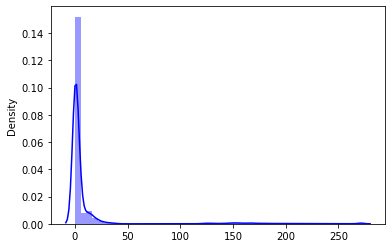

In [25]:
sns.distplot(df_final,kde=True,color='blue');

**As per the distribution plot, data is not too much spreadout, but because of the field "Cashback", can perform scaling, so that
all will be in same range**

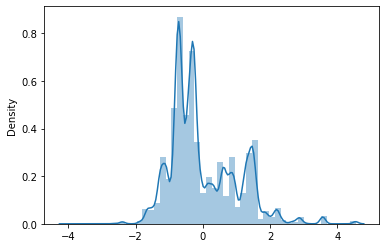

In [35]:
from scipy.stats import zscore
df_scaled= df_final.apply(zscore)
sns.distplot(df_scaled)

In [ ]:
df_final.to_excel(r'C:\Users\jpradhan\Downloads\Capstone-Project\customer_churn_final.xlsx', index = False)

**customer_churn_final.xlsx is the final data set for model building**

# **Model Building**

In [3]:
df=pd.read_excel("customer_churn_final.xlsx")

In [4]:
df.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0      1       4          2                6              3   
1      1       0          0                8              3   
2      1       0          0               30              2   
3      1       0          2               15              2   
4      1       0          0               12              2   

   Account_user_count  CC_Agent_Score  rev_per_month  rev_growth_yoy  \
0                   3               1              9              11   
1                   4               2              7              15   
2                   4               2              6              14   
3                   4               4              8              23   
4                   3               4              3              11   

   coupon_used_for_payment  ...  account_segment_Super_Plus  \
0                        1  ...                           0   
1                        0  ...                           0   
2                        0  ...                           0   
3                        0  ...                           0   
4                        1  ...                           0   

   Payment_Credit_Card  Payment_Debit_Card  Payment_E_wallet  Payment_UPI  \
0                    0                   1                 0            0   
1                    0                   0                 0            1   
2                    0                   1                 0            0   
3                    0                   1                 0            0   
4                    1                   0                 0            0   

   Marital_Status_Married  Marital_Status_Single  Gender_Male  \
0                       0                      1            0   
1                       0                      1            1   
2                       0                      1            1   
3                       0                      1            1   
4                       0                      1            1   

   Login_Device_Mobile  Complain_ly_Yes/No  
0                    1                   1  
1                    1                   1  
2                    1                   1  
3                    1                   0  
4                    1                   0  

[5 rows x 25 columns]

**Split Train and Test Data**

In [5]:
X = df.drop('Churn',axis=1)
Y=df['Churn']

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=1)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8445, 24)
(2815, 24)
(8445,)
(2815,)


# Logisic Regression

Simple Logistic Regression

Simple Logistic regression does not need any scaling. The rsult will be equivalent whether applying scaling or not.

Scaling requires when we apply regularization in to logistic regression.

In [32]:
simple_model_lg= LogisticRegression()
simple_model_lg.fit(X_train,Y_train)
y_train_predict_lg_sm = simple_model_lg.predict(X_train)
y_test_predict_lg_sm = simple_model_lg.predict(X_test)

In [33]:
Sm_LGR_Scores_train = simple_model_lg.score(X_train,Y_train)
Sm_LGR_Scores_train

0.8872705743043221

In [34]:
Sm_LGR_Scores_test = simple_model_lg.score(X_test,Y_test)
Sm_LGR_Scores_test

0.8898756660746003

Model is not overfitting/underfitting by looking into the accuracy

# Logistic Regression using Grid Search CV (Regularized)

In [35]:
x_scale=X.apply(zscore)
x_train_scale,x_test_scale,y_train,y_test=train_test_split(x_scale,Y,test_size=0.25,random_state=1)

grid={'penalty':['l1','l2','elasticnet'], 
     'solver': ['sag','lbfgs','liblinear','newton-cg'],
      'C':[0.001,.009,0.01,.09,25,50,100],
     'tol':[0.0001,0.001]} #Tolerance value which tells the alogorithim when to stop

model=LogisticRegression(max_iter=100,n_jobs=-1)

grid_search=GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1, scoring='accuracy')

grid_search.fit(x_train_scale,y_train)

grid_search.best_params_

best_model=grid_search.best_estimator_
best_model

LogisticRegression(C=25, n_jobs=-1, penalty='l1', solver='liblinear', tol=0.001)

In [36]:
y_train_predict_lg=best_model.predict(x_train_scale)
y_test_predict_lg=best_model.predict(x_test_scale)

In [37]:
LGR_Scores_train=best_model.score(x_train_scale,y_train)
LGR_Scores_train

0.8918886915334517

In [38]:
LGR_Scores_test=best_model.score(x_test_scale,Y_test)
LGR_Scores_test

0.8873889875666074

In [48]:
best_model.coef_

array([[-1.60473597,  0.34098956,  0.25371287, -0.02475313,  0.33795704,
         0.36091522,  0.45292751, -0.06779407,  0.15085993, -0.23843049,
        -0.31219512,  0.34299175, -0.09279905, -0.6318682 ,  0.07213227,
        -0.36684231, -0.28671914, -0.02729989, -0.19679925, -0.16152573,
         0.32546319,  0.14053382, -0.19184219,  0.76800526]])

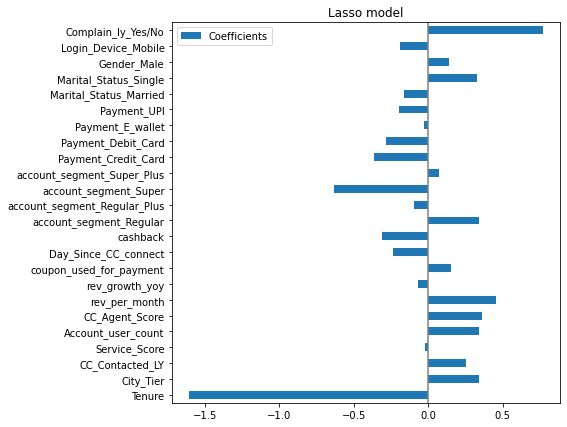

In [49]:
coefs = pd.DataFrame(
   best_model.coef_[0],
   columns=['Coefficients'], index=x_train_scale.columns
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Linear Discriminant Analysis

LD = a1 X1 + a2 X2 + a3 X3-------an Xn

Linear Discriminant Analysis (LDA) finds it's coefficients using the variation between the classes, so the scaling doesn't matter either

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
lda = LinearDiscriminantAnalysis()

lda=lda.fit(X_train, Y_train)


In [40]:
train_lda=lda.predict(X_train)
train_lda_score=lda.score(X_train, Y_train)
train_lda_score

0.8852575488454707

In [41]:
test_lda=lda.predict(X_test)
test_lda_score=lda.score(X_test, Y_test)
test_lda_score

0.8806394316163411

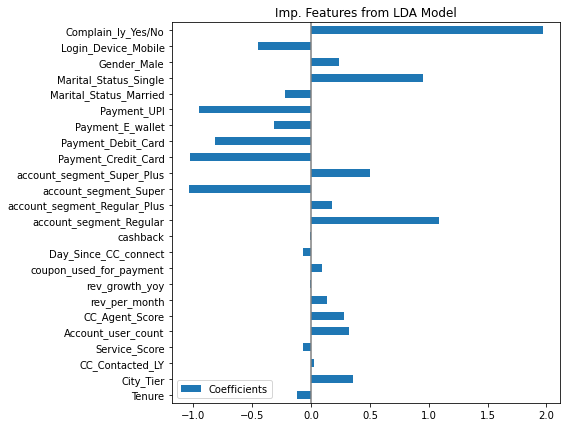

In [42]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   lda.coef_[0],
   columns=['Coefficients'], index=X_train.columns
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Imp. Features from LDA Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Model is not overfitting/Underfitting

# KNN

K is the number of nearest neighbours want to select. For an example there is a new point came and want to predict whether it will in churn group pr not churned group. If I am selecting K =3 it means it will select 3 nearest numbers of that new point based on on the least distance. What ever point is more in that group, the new point will belong to that point's group (0/1)

If we use Euclidian distance: It will be cauclated as square root of difference between a new point and the existing point

d = √[ (x 2 – x 1 )2 + (y 2 – y 1 )2]

Manhattan Distance : |x2-x1| + |y2-y1|

KNN use 'minkowski' distance calculation by default. 'minkowski' distance is used to find manhattan distance by setting up P value as 1. Manhatta distance is being used on High-Domension data.

So here we will use Euclidian distance, because data set is not high dimensional, it is scaled and no outlier.

In [8]:
X_scale=X.apply(zscore)

x_train,x_test,y_train,y_test=train_test_split(X_scale,Y, train_size=0.75,random_state=1)

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier(metric='manhattan')
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_search_knn=knn_grid.fit(x_train, y_train)

knn_grid.best_params_

best_model_knn = knn_grid.best_estimator_
best_model_knn

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.4min finished


KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [9]:
train_knn=best_model_knn.predict(x_train)
train_knn_score=best_model_knn.score(x_train, y_train)
train_knn_score

1.0

In [10]:
test_knn=best_model_knn.predict(x_test)
test_knn_score=best_model_knn.score(x_test, y_test)
test_knn_score

0.9896980461811723

# Naive Bayes

Simple Naive Bayes

In [46]:
model_nb= GaussianNB()

model_nb.fit(X_train,Y_train)
model_nb_predict_train = model_nb.predict(X_train)
model_nb_predict_test = model_nb.predict(X_test)

In [47]:
model_nb_predict_train_score = model_nb.score(X_train,Y_train)
model_nb_predict_train_score

0.780461811722913

In [48]:
model_nb_predict_test_score = model_nb.score(X_test,Y_test)
model_nb_predict_test_score

0.7680284191829485

Naive Bayes using Grid search CV

In [49]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, Y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.6s


GaussianNB(var_smoothing=0.0004328761281083057)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.5s finished


In [50]:
nbModel_grid.best_params_

{'var_smoothing': 0.0004328761281083057}

In [51]:
best_model_nb = nbModel_grid.best_estimator_
best_model_nb

GaussianNB(var_smoothing=0.0004328761281083057)

In [52]:
train_nb=best_model_nb.predict(X_train)
score_nb_grid_train=best_model_nb.score(X_train, Y_train)
score_nb_grid_train

0.8684428656009473

In [53]:
test_nb=best_model_nb.predict(X_test)
score_nb_grid_test=best_model_nb.score(X_test, Y_test)
score_nb_grid_test

0.8642984014209592

Model is not overfitting/underfitting

# Simple Decession Tree

In [54]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,Y_train)
ytrain_predict_sm_dt = dt.predict(X_train)
ytest_predict_sm_dt = dt.predict(X_test)

In [55]:
score_sm_dt_train=dt.score(X_train, Y_train)
score_sm_dt_train

1.0

In [56]:
score_sm_dt_test=dt.score(X_test, Y_test)
score_sm_dt_test

0.938898756660746

# Decesion Tree using grid serach CV


Entropy: Entropy which is nothing but a metric which calculate impurity or uncertainty in a group of observation.

Low entropy means all observations are similar which is high gained information and High entropy means there is 50/50 percent of similarties and so these are low gained information.

Decesion tree should be based on high gained information.

Gini Impurity: When data points are not scattered in a manner can use Gini.

In [57]:
param_grid_dtcl = {
    'criterion': ['gini','entropy'],
    'max_depth': [10,12,13,14,15], #Maximum depth of the tree: as per industry standard 10-15
    'min_samples_leaf': [50,67,100,150], #Minmum no of observations we can have in the leaf node : min sample split/3
    'min_samples_split': [200,250,300,450] #minimum no of sample 2%-3% of the data set.But we should alwys take more than 100 to overcome multiple trees.
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_dt_model = GridSearchCV(estimator = dt_model, param_grid = param_grid_dtcl, cv = 10,scoring='recall')
#CV=10 means model devided train dataset into 10 parts
#Accuracy is average of all accuracy of 10 

grid_search_dt_model.fit(X_train,Y_train)

grid_search_dt_model.best_params_

best_grid_dt = grid_search_dt_model.best_estimator_
print(best_grid_dt)


train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('C:\\Users\\jpradhan\\Downloads\\Cart\\Insurance_Tree.dot','w')
dot_data = tree.export_graphviz(best_grid_dt , out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=450, random_state=1)


                              Important
Tenure                         0.625397
Complain_ly_Yes/No             0.130257
Day_Since_CC_connect           0.061426
CC_Agent_Score                 0.058364
account_segment_Super          0.027572
Account_user_count             0.023099
Marital_Status_Single          0.021018
rev_per_month                  0.015588
Login_Device_Mobile            0.014676
CC_Contacted_LY                0.008236
Payment_UPI                    0.007147
coupon_used_for_payment        0.003985
Payment_Debit_Card             0.003236
cashback                       0.000000
account_segment_Regular        0.000000
City_Tier                      0.000000
Service_Score                  0.000000
account_segment_Super_Plus     0.000000
Payment_Credit_Card            0.000000
Payment_E_wallet               0.000000
Marital_Status_Married         0.000000
Gender_Male                    0.000000
rev_growth_yoy                 0.000000
account_segment_Regular_Plus   0.000000


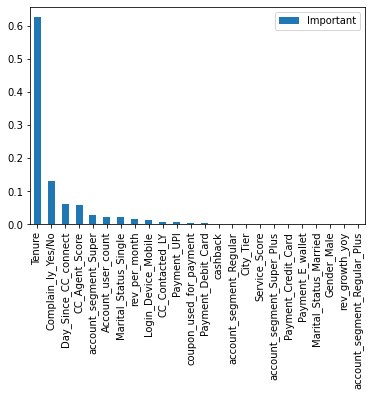

In [58]:
pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False).plot(kind='bar');
print(pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False))

In [59]:
#Prediction on train and test dataset
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

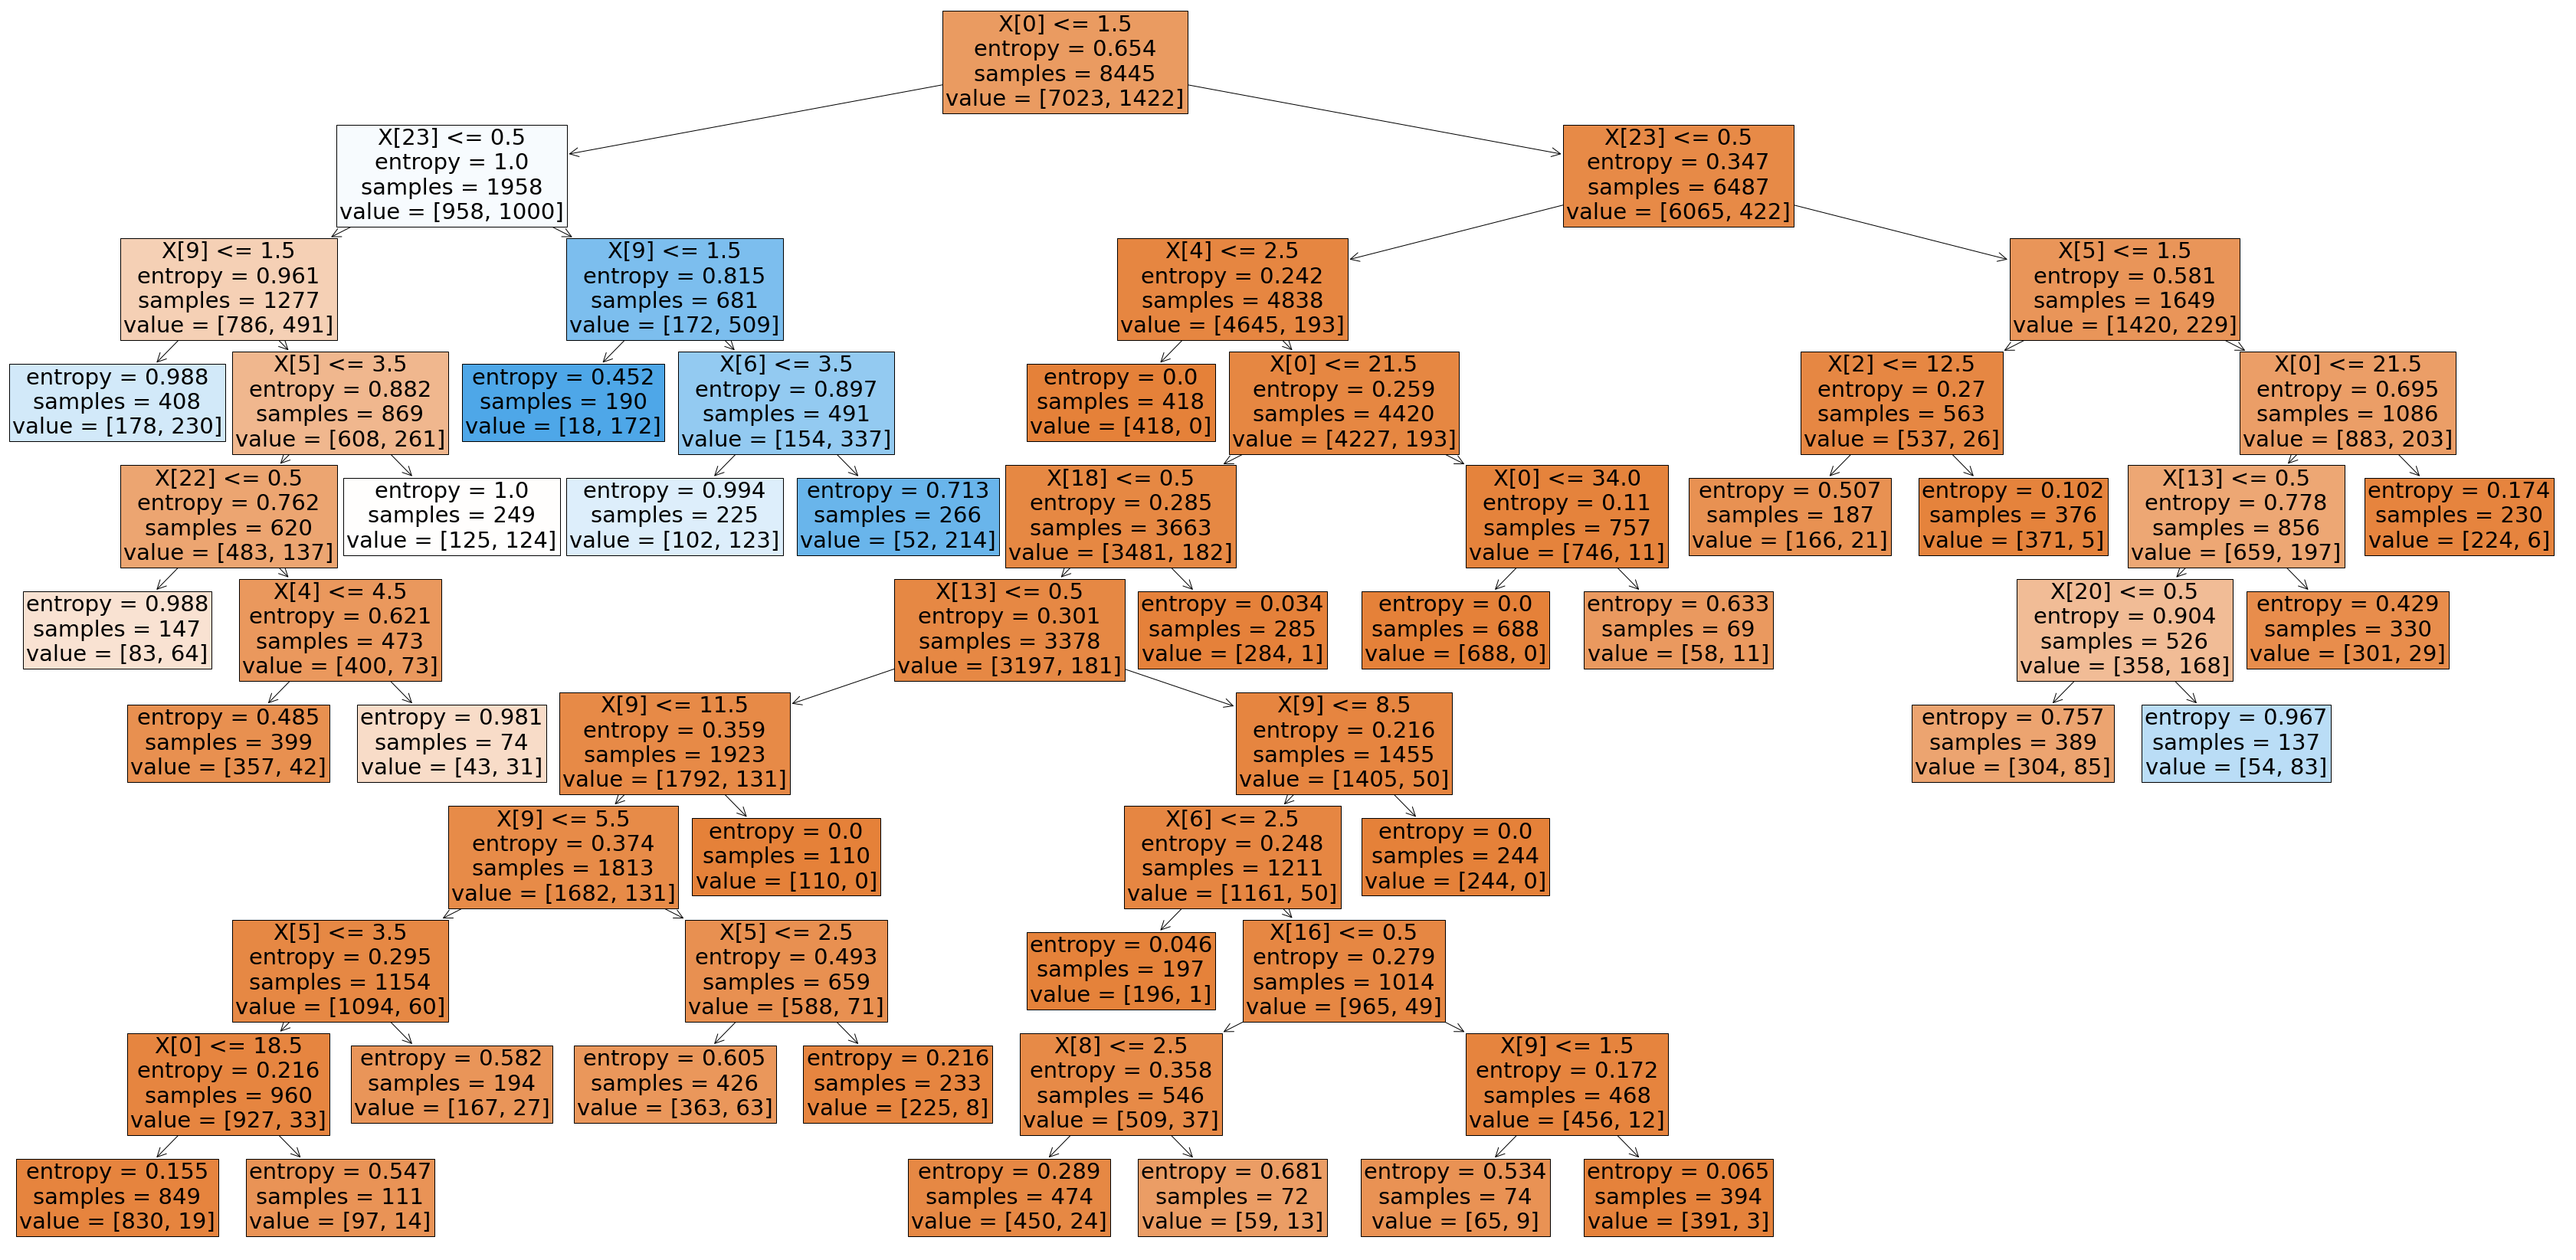

In [60]:
fig, ax = plt.subplots(figsize=(60, 30))
out=tree.plot_tree(best_grid_dt,filled=True,fontsize=29);
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [61]:
score_grid_dt_train=best_grid_dt.score(X_train, Y_train)
score_grid_dt_train

0.8811130846654825

In [63]:
score_grid_dt_test=best_grid_dt.score(X_test, Y_test)
score_grid_dt_test

0.8795737122557726

# Simple Random Forest

In [17]:
rf = RandomForestClassifier()

rf.fit(X_train,Y_train)

sm_rf_predict_train = rf.predict(X_train)

sm_rf_predict_test = rf.predict(X_test)

In [18]:
sm_rf_train_score= rf.score(X_train,Y_train)
sm_rf_train_score

1.0

In [19]:
sm_rf_test_score= rf.score(X_test,Y_test)
sm_rf_test_score

0.9730017761989342

# Random Forest using Grid Search

In [67]:
param_grid_rfcl = {
    'max_depth': [10,11,14,15], #Ideally 10-15 as per industry standard, But can change based on analysis
    'max_features': [5,7,9,11,12],  #Range between Square root of 24(no of independent variable) to 50% of independent variable)
    'min_samples_leaf': [50,75], #min_samples_split/3 but can change as per performance analysis
    'min_samples_split': [200,225], #Ideally 2%-3% of the data but again can decide based on analysis
    'n_estimators': [101] #n_estimator should not alwyas be more than 100 range,otherwise unnecessary it will increase the process 
    #And alwyas take a odd number so that it will overcome the problem of if both 0 and 1 is having similar count, which value model will choose as final number
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

grid_search_rfcl.fit(X_train,Y_train)
grid_search_rfcl.best_params_

best_grid_rfcl=grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=10, max_features=12, min_samples_leaf=50,
                       min_samples_split=200, n_estimators=101, random_state=1)

                              Important
Tenure                         0.225717
cashback                       0.085883
CC_Contacted_LY                0.070892
Day_Since_CC_connect           0.069460
Complain_ly_Yes/No             0.068015
rev_growth_yoy                 0.063660
rev_per_month                  0.056004
CC_Agent_Score                 0.054320
Account_user_count             0.033957
coupon_used_for_payment        0.028057
City_Tier                      0.027101
account_segment_Regular_Plus   0.026961
Marital_Status_Single          0.026068
Service_Score                  0.023419
Login_Device_Mobile            0.021291
Gender_Male                    0.021249
Payment_Credit_Card            0.020054
Payment_Debit_Card             0.017382
Marital_Status_Married         0.016940
account_segment_Super          0.016633
Payment_E_wallet               0.011404
Payment_UPI                    0.007926
account_segment_Super_Plus     0.004110
account_segment_Regular        0.003497


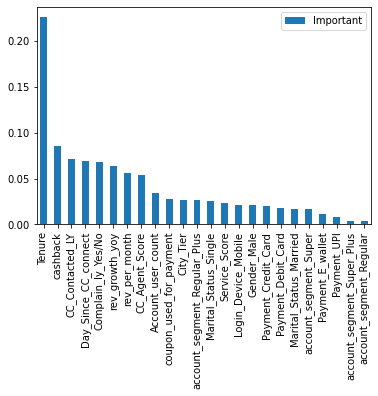

In [20]:
pd.DataFrame(rf.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False).plot(kind='bar');
print(pd.DataFrame(rf.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False))

In [69]:
train_rf=best_grid_rfcl.predict(X_train)
score_rf_grid_train=best_grid_rfcl.score(X_train, Y_train)
score_rf_grid_train

0.8920071047957371

In [70]:
test_rf=best_grid_rfcl.predict(X_test)
score_rf_grid_test=best_grid_rfcl.score(X_test, Y_test)
score_rf_grid_test

0.8930728241563055

# Artificial Neural Networks

In [71]:
ann=MLPClassifier(random_state=1)
ann.fit(x_train_scale,y_train)

ytrain_predict_ann = ann.predict(x_train_scale)
ytest_predict_ann = ann.predict(x_test_scale)

In [72]:
an_train_score=ann.score(x_train_scale,y_train)
print(an_train_score)

0.9968028419182948


In [73]:
an_test_score=ann.score(x_test_scale,y_test)
print(an_test_score)

0.9733570159857904


# Performace Metrics

Simple Logistic Regression:

Train data

Accuracy

In [74]:
Sm_LGR_Scores_train = simple_model_lg.score(X_train,Y_train)
Sm_LGR_Scores_train

0.8872705743043221

In [75]:
print(classification_report(Y_train,y_train_predict_lg_sm))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7023
           1       0.75      0.49      0.60      1422

    accuracy                           0.89      8445
   macro avg       0.83      0.73      0.76      8445
weighted avg       0.88      0.89      0.88      8445



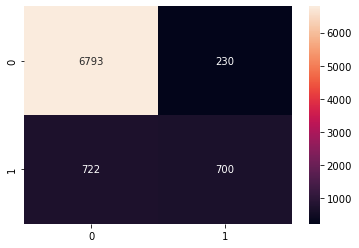

In [76]:
sns.heatmap(confusion_matrix(Y_train,y_train_predict_lg_sm),annot=True,fmt='.5g');

AUC: 0.874


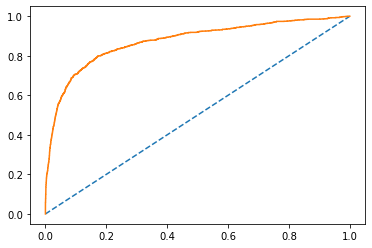

In [77]:
probs=simple_model_lg.predict_proba(X_train)
probs=probs[:,1]
auc_sm_lg_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_sm_lg_train)
train_fpr_sm_lg,train_tpr_sm_lg,train_thershold_sm_lg=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_sm_lg,train_tpr_sm_lg);

Test Data

Accuracy:

In [78]:
Sm_LGR_Scores_test = simple_model_lg.score(X_test,Y_test)
Sm_LGR_Scores_test

0.8898756660746003

In [79]:
print(classification_report(Y_test,y_test_predict_lg_sm))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2341
           1       0.77      0.49      0.60       474

    accuracy                           0.89      2815
   macro avg       0.84      0.73      0.77      2815
weighted avg       0.88      0.89      0.88      2815



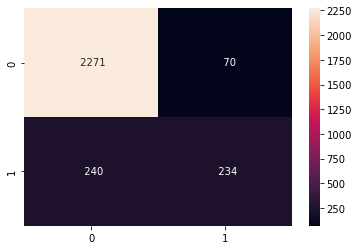

In [80]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_lg_sm),annot=True,fmt='5g');

AUC: 0.869


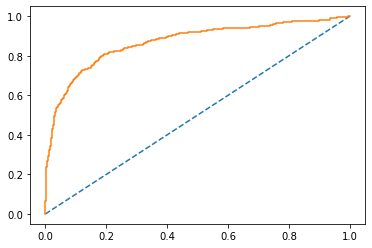

In [81]:
probs=simple_model_lg.predict_proba(X_test)
probs=probs[:,1]
auc_sm_lg_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_sm_lg_test)
test_fpr_sm_lg,test_tpr_sm_lg,test_thershold_sm_lg=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_sm_lg,test_tpr_sm_lg);

# Regularized Logistic Regression Train Data

In [82]:
LGR_Scores_train=best_model.score(x_train_scale,y_train)
LGR_Scores_train

0.8918886915334517

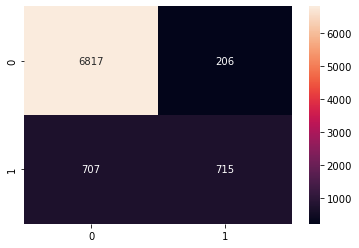

In [83]:
sns.heatmap(confusion_matrix(y_train,y_train_predict_lg),annot=True,fmt='.5g');

In [84]:
classification_report_lrg=metrics.classification_report(y_train,y_train_predict_lg)

print(classification_report_lrg)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7023
           1       0.78      0.50      0.61      1422

    accuracy                           0.89      8445
   macro avg       0.84      0.74      0.77      8445
weighted avg       0.88      0.89      0.88      8445



AUC: 0.882


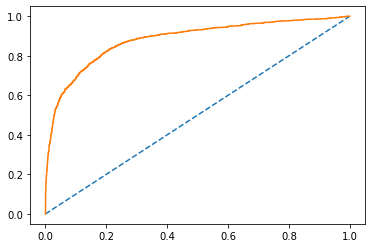

In [85]:
probs=best_model.predict_proba(x_train_scale)
probs=probs[:,1]
auc_lgr_train=roc_auc_score(y_train,probs)
print('AUC: %.3f' %auc_lgr_train)
train_fpr_lg,train_tpr_lg,train_thershold_lg=roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_lg,train_tpr_lg);

Test

In [86]:
LGR_Scores_test=best_model.score(x_test_scale,y_test)
LGR_Scores_test

0.8873889875666074

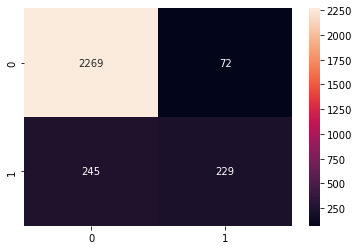

In [87]:
sns.heatmap(confusion_matrix(y_test, y_test_predict_lg),annot=True,fmt='.5g');

In [88]:
classification_report_lrg_test=metrics.classification_report(y_test, y_test_predict_lg)

print(classification_report_lrg_test)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2341
           1       0.76      0.48      0.59       474

    accuracy                           0.89      2815
   macro avg       0.83      0.73      0.76      2815
weighted avg       0.88      0.89      0.88      2815



AUC: 0.873


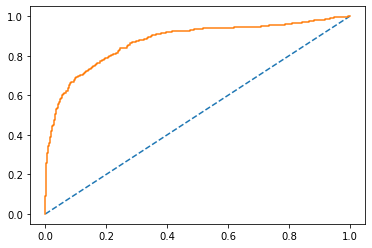

In [89]:
probs=best_model.predict_proba(x_test_scale)
probs=probs[:,1]
auc_lgr_test=roc_auc_score(y_test,probs)
print('AUC: %.3f' %auc_lgr_test)
test_fpr_lg,test_tpr_lg,test_thershold_lg=roc_curve(y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_lg,test_tpr_lg);

# LDA Performance Metrics

Train Data

In [90]:
LDA_Scores_train=lda.score(X_train,Y_train)
LDA_Scores_train

0.8852575488454707

In [91]:
classification_lda_train=metrics.classification_report(Y_train,train_lda)
print(classification_lda_train)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7023
           1       0.76      0.46      0.58      1422

    accuracy                           0.89      8445
   macro avg       0.83      0.72      0.76      8445
weighted avg       0.88      0.89      0.87      8445



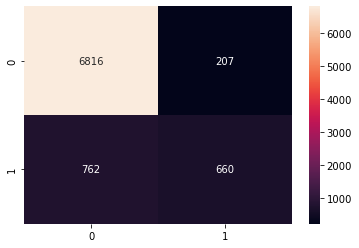

In [92]:
sns.heatmap(confusion_matrix(Y_train,train_lda),annot=True,fmt='.5g');

AUC: 0.873


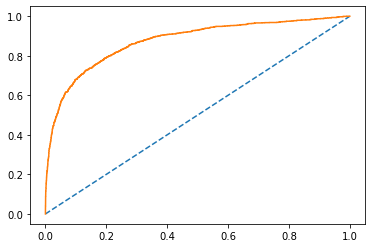

In [93]:
probs=lda.predict_proba(X_train)
probs=probs[:,1]
auc_lda_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_lda_train)
train_fpr_lda,train_tpr_lda,train_thershold_lda=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_lda,train_tpr_lda);

Test

In [94]:
LDA_Scores_test = lda.score(X_test,Y_test)
print(LDA_Scores_test)

0.8806394316163411


In [95]:
classification_lda_test=metrics.classification_report(Y_test,test_lda)
print(classification_lda_test)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2341
           1       0.74      0.45      0.56       474

    accuracy                           0.88      2815
   macro avg       0.82      0.71      0.75      2815
weighted avg       0.87      0.88      0.87      2815



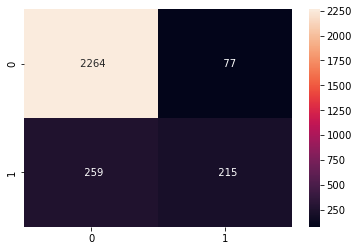

In [96]:
sns.heatmap(confusion_matrix(Y_test,test_lda),annot=True,fmt='5g');

AUC: 0.860


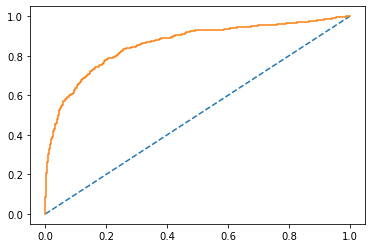

In [97]:
probs=lda.predict_proba(X_test)
probs=probs[:,1]
auc_lda_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_lda_test)
test_fpr_lda,test_tpr_lda,test_thershold_lda=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_lda,test_tpr_lda);

# KNN Model

Train

In [98]:
KNN_model_score_train= best_model_knn.score(x_train, y_train)
KNN_model_score_train

1.0

In [99]:
print(metrics.classification_report(y_train,train_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445



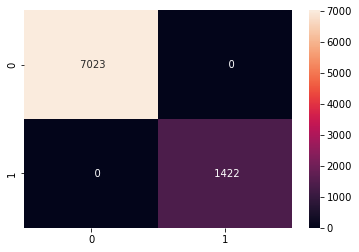

In [100]:
sns.heatmap(confusion_matrix(y_train,train_knn),annot=True,fmt='5g');

AUC: 1.000


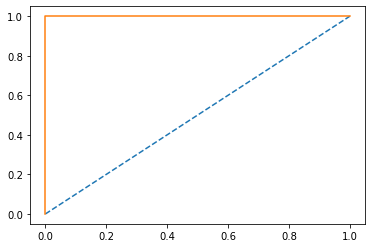

In [101]:
probs=best_model_knn.predict_proba(x_train)
probs=probs[:,1]
auc_knn_train=roc_auc_score(y_train,probs)
print('AUC: %.3f' %auc_knn_train)
train_fpr_knn,train_tpr_knn,train_thershold_knn=roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_knn,train_tpr_knn);

**Test**

In [102]:
KNN_model_score_test = best_model_knn.score(x_test,y_test)
KNN_model_score_test

0.9896980461811723

In [103]:
print(metrics.classification_report(y_test,test_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2341
           1       0.97      0.97      0.97       474

    accuracy                           0.99      2815
   macro avg       0.98      0.98      0.98      2815
weighted avg       0.99      0.99      0.99      2815



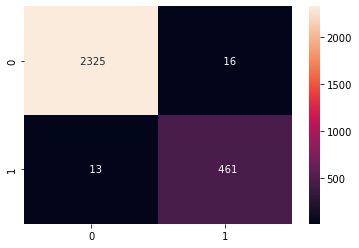

In [104]:
sns.heatmap(confusion_matrix(y_test,test_knn),annot=True,fmt='5g');

AUC: 0.983


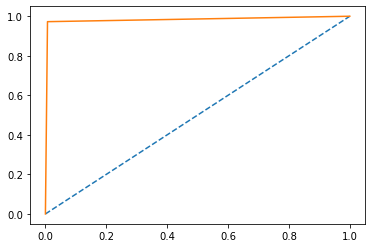

In [105]:
probs=best_model_knn.predict_proba(x_test)
probs=probs[:,1]
auc_knn_test=roc_auc_score(y_test,probs)
print('AUC: %.3f' %auc_knn_test)
test_fpr_knn,test_tpr_knn,test_thershold_knn=roc_curve(y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_knn,test_tpr_knn);

# Simple Naive Bayes

Train

In [106]:
model_nb_train_score = model_nb.score(X_train,Y_train)
model_nb_train_score

0.780461811722913

In [107]:
print(classification_report(Y_train,model_nb_predict_train));

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      7023
           1       0.41      0.72      0.52      1422

    accuracy                           0.78      8445
   macro avg       0.67      0.76      0.69      8445
weighted avg       0.85      0.78      0.80      8445



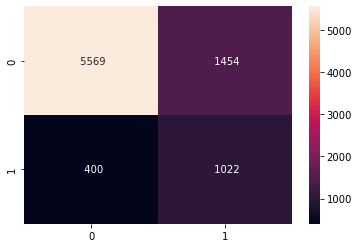

In [108]:
sns.heatmap(confusion_matrix(Y_train,model_nb_predict_train),annot=True,fmt='5g');

AUC: 0.818


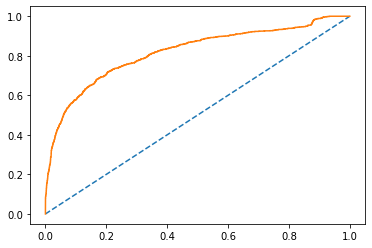

In [109]:
probs=model_nb.predict_proba(X_train)
probs=probs[:,1]
auc_sm_nb_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_sm_nb_train)
train_fpr_sm_nb,train_tpr_sm_nb,train_thershold_sm_nb=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_sm_nb,train_tpr_sm_nb);

 test

In [110]:
model_nb_test_score = model_nb.score(X_test,Y_test)
model_nb_test_score

0.7680284191829485

In [111]:
print(classification_report(Y_test,model_nb_predict_test));

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2341
           1       0.39      0.68      0.50       474

    accuracy                           0.77      2815
   macro avg       0.66      0.73      0.67      2815
weighted avg       0.83      0.77      0.79      2815



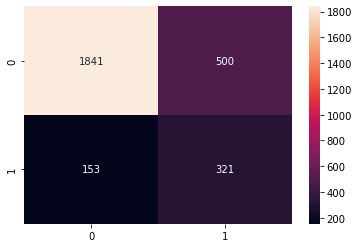

In [112]:
sns.heatmap(confusion_matrix(Y_test,model_nb_predict_test),annot=True,fmt='.5g');

AUC: 0.812


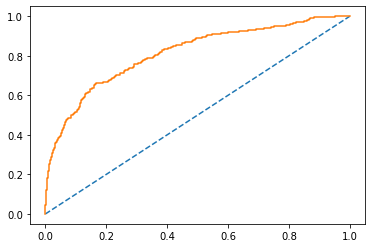

In [113]:
probs=model_nb.predict_proba(X_test)
probs=probs[:,1]
auc_sm_nb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_sm_nb_test)
test_fpr_sm_nb,test_tpr_sm_nb,test_thershold_sm_nb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_sm_nb,test_tpr_sm_nb);

# Naive Bayes using Grid Search CV

Train

In [114]:
model_score_bayes_train = best_model_nb.score(X_train, Y_train)
model_score_bayes_train

0.8684428656009473

In [115]:
print(metrics.classification_report(Y_train,train_nb))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7023
           1       0.65      0.48      0.55      1422

    accuracy                           0.87      8445
   macro avg       0.77      0.71      0.74      8445
weighted avg       0.86      0.87      0.86      8445



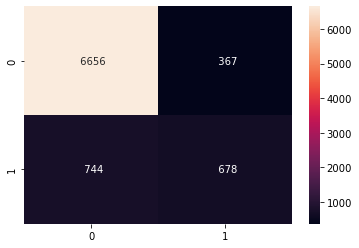

In [116]:
sns.heatmap(confusion_matrix(Y_train,train_nb),annot=True,fmt='5g');

AUC: 0.814


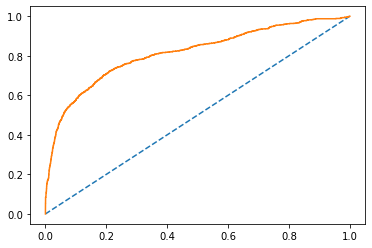

In [117]:
probs=best_model_nb.predict_proba(X_train)
probs=probs[:,1]
auc_nb_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_nb_train)
train_fpr_nb,train_tpr_nb,train_thershold_nb=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_nb,train_tpr_nb);

Test

In [118]:
model_score_bayes_test = best_model_nb.score(X_test, Y_test)
model_score_bayes_test

0.8642984014209592

In [119]:
print(metrics.classification_report(Y_test,test_nb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2341
           1       0.65      0.43      0.52       474

    accuracy                           0.86      2815
   macro avg       0.77      0.69      0.72      2815
weighted avg       0.85      0.86      0.85      2815



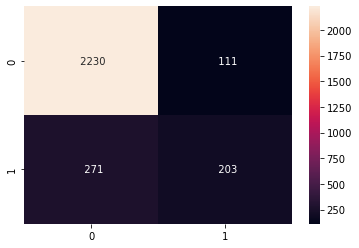

In [120]:
sns.heatmap(confusion_matrix(Y_test,test_nb),annot=True,fmt='5g');

AUC: 0.814


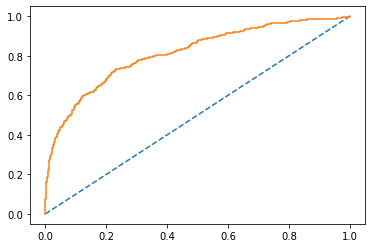

In [121]:
probs=best_model_nb.predict_proba(X_test)
probs=probs[:,1]
auc_nb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_nb_train)
test_fpr_nb,test_tpr_nb,test_thershold_nb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_nb,test_tpr_nb);

# Simple Decesion tree

Train

In [122]:
score_sm_dt_train = dt.score(X_train,Y_train)
score_sm_dt_train

1.0

In [123]:
print(classification_report(Y_train,ytrain_predict_sm_dt));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445



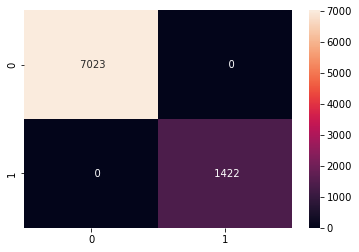

In [124]:
sns.heatmap(confusion_matrix(Y_train,ytrain_predict_sm_dt),annot=True,fmt='5g');

AUC: 1.000


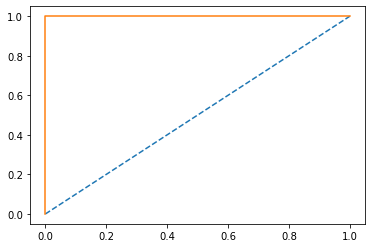

In [125]:
probs=dt.predict_proba(X_train)
probs=probs[:,1]
auc_sm_dt_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_sm_dt_train)
train_fpr_sm_dt,train_tpr_sm_dt,train_thershold_sm_dt=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_sm_dt,train_tpr_sm_dt);

Test

In [126]:
score_sm_dt_test = dt.score(X_test,Y_test)
score_sm_dt_test

0.938898756660746

In [127]:
print(classification_report(Y_test,ytest_predict_sm_dt));

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2341
           1       0.82      0.81      0.82       474

    accuracy                           0.94      2815
   macro avg       0.89      0.89      0.89      2815
weighted avg       0.94      0.94      0.94      2815



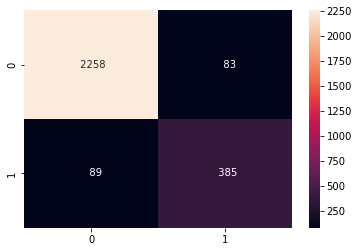

In [128]:
sns.heatmap(confusion_matrix(Y_test,ytest_predict_sm_dt),annot=True,fmt='5g');

AUC: 0.888


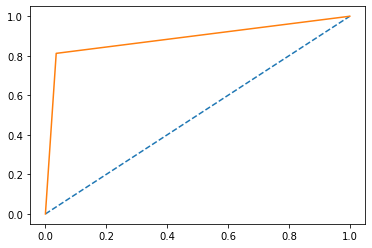

In [129]:
probs=dt.predict_proba(X_test)
probs=probs[:,1]
auc_sm_dt_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_sm_dt_test)
test_fpr_sm_dt,test_tpr_sm_dt,test_thershold_sm_dt=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_sm_dt,test_tpr_sm_dt);

# Decesion tree using Grid Search

Train

In [130]:
model_score_dt_train = best_grid_dt.score(X_train,Y_train)
model_score_dt_train

0.8811130846654825

In [131]:
print(metrics.classification_report(Y_train,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7023
           1       0.67      0.58      0.62      1422

    accuracy                           0.88      8445
   macro avg       0.79      0.76      0.78      8445
weighted avg       0.88      0.88      0.88      8445



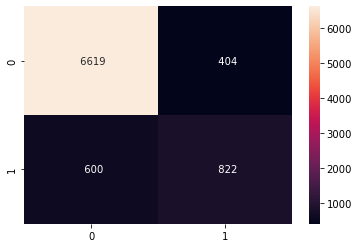

In [132]:
sns.heatmap(confusion_matrix(Y_train,ytrain_predict_dt),annot=True,fmt='5g');

AUC: 0.909


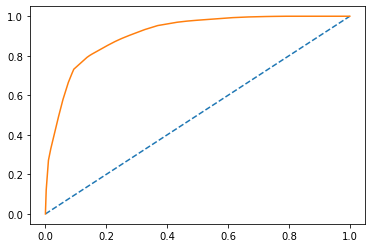

In [133]:
probs=best_grid_dt.predict_proba(X_train)
probs=probs[:,1]
auc_dt_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_dt_train)
train_fpr_dt,train_tpr_dt,train_thershold_dt=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_dt,train_tpr_dt);

Test

In [134]:
model_score_dt_test = best_grid_dt.score(X_test,Y_test)
model_score_dt_test

0.8795737122557726

In [135]:
print(classification_report(Y_test,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2341
           1       0.67      0.57      0.62       474

    accuracy                           0.88      2815
   macro avg       0.79      0.76      0.77      2815
weighted avg       0.87      0.88      0.88      2815



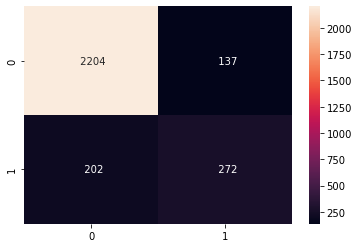

In [136]:
sns.heatmap(confusion_matrix(Y_test,ytest_predict_dt),annot=True,fmt='5g');

AUC: 0.891


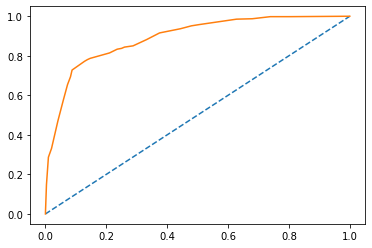

In [137]:
probs=best_grid_dt.predict_proba(X_test)
probs=probs[:,1]
auc_dt_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_dt_test)
test_fpr_dt,test_tpr_dt,test_thershold_dt=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_dt,test_tpr_dt);

# Simple Random Forest

Train

In [138]:
sm_rf_train_score = rf.score(X_train,Y_train)
sm_rf_train_score

1.0

In [139]:
print(classification_report(Y_train,sm_rf_predict_train));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445



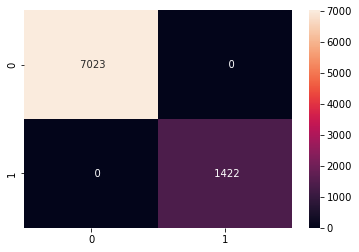

In [140]:
sns.heatmap(confusion_matrix(Y_train,sm_rf_predict_train),annot=True,fmt='5g');

AUC: 1.000


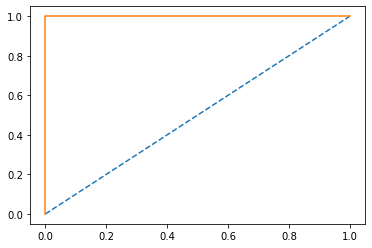

In [141]:
probs=rf.predict_proba(X_train)
probs=probs[:,1]
auc_sm_rf_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_sm_rf_train)
train_fpr_sm_rf,train_tpr_sm_rf,train_thershold_sm_rf=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_sm_rf,train_tpr_sm_rf);

Test

In [142]:
sm_rf_test_score = rf.score(X_test,Y_test)
sm_rf_test_score 

0.9680284191829485

In [143]:
print(classification_report(Y_test,sm_rf_predict_test));

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2341
           1       0.98      0.82      0.90       474

    accuracy                           0.97      2815
   macro avg       0.97      0.91      0.94      2815
weighted avg       0.97      0.97      0.97      2815



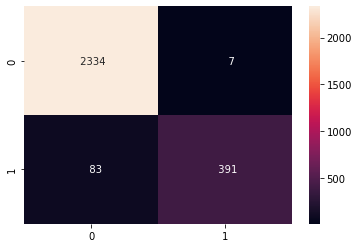

In [144]:
sns.heatmap(confusion_matrix(Y_test,sm_rf_predict_test),annot=True,fmt='5g');

AUC: 0.993


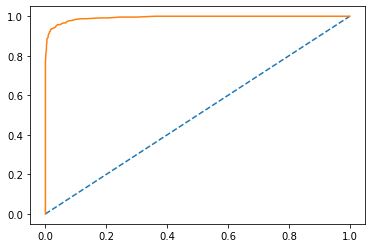

In [145]:
probs=rf.predict_proba(X_test)
probs=probs[:,1]
auc_sm_rf_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_sm_rf_test)
test_fpr_sm_rf,test_tpr_sm_rf,test_thershold_sm_rf=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_sm_rf,test_tpr_sm_rf);

# Random Forest using grid search

Train

In [146]:
model_score_rf_train=best_grid_rfcl.score(X_train,Y_train)
model_score_rf_train

0.8920071047957371

In [147]:
print(classification_report(Y_train,train_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7023
           1       0.76      0.53      0.62      1422

    accuracy                           0.89      8445
   macro avg       0.83      0.75      0.78      8445
weighted avg       0.88      0.89      0.88      8445



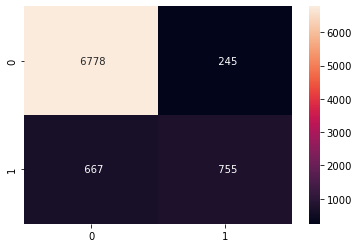

In [148]:
sns.heatmap(confusion_matrix(Y_train,train_rf),annot=True,fmt='5g');

AUC: 0.930


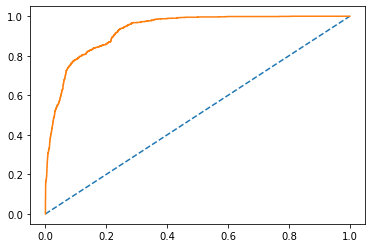

In [149]:
probs=best_grid_rfcl.predict_proba(X_train)
probs=probs[:,1]
auc_rf_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_rf_train)
train_fpr_rf,train_tpr_rf,train_thershold_rf=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_rf,train_tpr_rf);

test

In [150]:
model_score_rf_test=best_grid_rfcl.score(X_test,Y_test)
model_score_rf_test

0.8930728241563055

In [151]:
print(classification_report(Y_test,test_rf));

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2341
           1       0.76      0.53      0.63       474

    accuracy                           0.89      2815
   macro avg       0.84      0.75      0.78      2815
weighted avg       0.89      0.89      0.89      2815



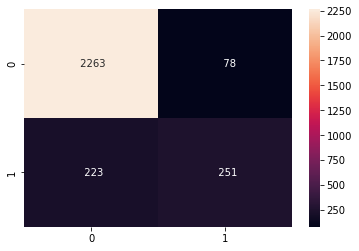

In [164]:
sns.heatmap(confusion_matrix(Y_test,test_rf),annot=True,fmt='5g');

AUC: 0.920


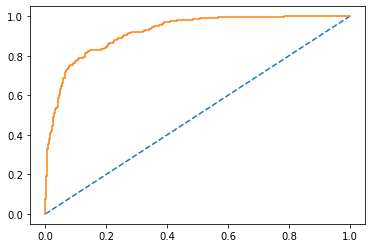

In [152]:
probs=best_grid_rfcl.predict_proba(X_test)
probs=probs[:,1]
auc_rf_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_rf_test)
test_fpr_rf,test_tpr_rf,test_thershold_rf=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_rf,test_tpr_rf);

# Artificial Neural Networks

Train

In [153]:
model_score_ann_train=ann.score(x_train_scale,y_train)
model_score_ann_train

0.9968028419182948

In [154]:
print(classification_report(y_train,ytrain_predict_ann));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      0.98      0.99      1422

    accuracy                           1.00      8445
   macro avg       1.00      0.99      0.99      8445
weighted avg       1.00      1.00      1.00      8445



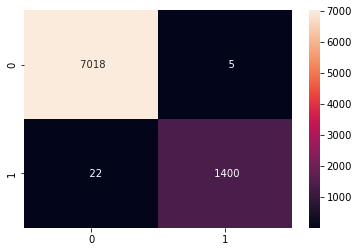

In [155]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_ann),annot=True,fmt='5g');

AUC: 1.000


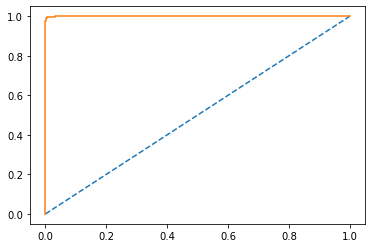

In [156]:
probs=ann.predict_proba(x_train_scale)
probs=probs[:,1]
auc_ann_train=roc_auc_score(y_train,probs)
print('AUC: %.3f' %auc_ann_train)
train_fpr_ann,train_tpr_ann,train_thershold_ann=roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_ann,train_tpr_ann);

test

In [157]:
model_score_ann_test=ann.score(x_test_scale,y_test)
model_score_ann_test

0.9733570159857904

In [158]:
print(classification_report(y_test,ytest_predict_ann));

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2341
           1       0.96      0.88      0.92       474

    accuracy                           0.97      2815
   macro avg       0.97      0.94      0.95      2815
weighted avg       0.97      0.97      0.97      2815



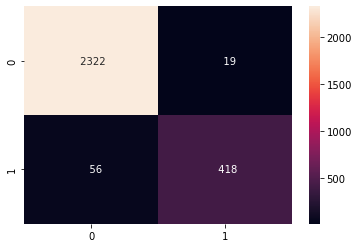

In [159]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_ann),annot=True,fmt='5g');

AUC: 0.988


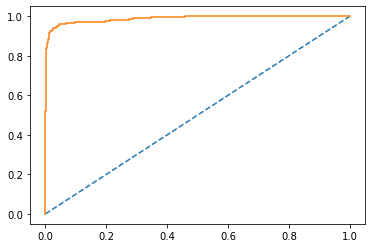

In [160]:
probs=ann.predict_proba(x_test_scale)
probs=probs[:,1]
auc_ann_test=roc_auc_score(y_test,probs)
print('AUC: %.3f' %auc_ann_test)
test_fpr_ann,test_tpr_ann,test_thershold_ann=roc_curve(y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_ann,test_tpr_ann);

# Final Model

In [161]:
train_scores=[0.89,0.89,0.89,1.00,0.78,0.87,1.00,0.88,1.00,0.89,1.00]
test_scores=[0.89,0.89,0.88,0.99,0.77,0.86,0.94,0.88,0.97,0.89,0.97]
recall_train=[0.49,0.50,0.46,1.00,0.72,0.48,1.00,0.58,1.00,0.53,0.98]
recall_test=[0.49,0.48,0.45,0.97,0.68,0.43,0.81,0.57,0.82,0.53,0.88]
precision_train=[0.75,0.78,0.76,1.00,0.41,0.65,1.00,0.67,1.00,0.76,1.00]
precision_test=[0.77,0.76,0.74,0.97,0.39,0.65,0.82,0.67,0.98,0.76,0.96]
f1score_train=[0.60,0.61,0.58,1.00,0.52,0.55,1.00,0.62,1.00,0.62,0.99]
f1score_test=[0.60,0.59,0.56,0.97,0.50,0.52,0.82,0.62,0.90,0.63,0.92]
auc_train=[0.874,0.882,0.873,1.000,0.818,0.814,1.000,0.909,1.000,0.930,1.000]
auc_test=[0.869,0.873,0.860,0.983,0.812,0.814,0.888,0.891,0.993,0.920,0.988]
performance_comp=(pd.DataFrame({'Train_Accuracy': train_scores,'Test_Accuracy': test_scores,'Train_Recall':recall_train,'Test_Recall': recall_test,'Train_precision':precision_train,'Test_precision': precision_test,'Train_f1':f1score_train,'Test_f1': f1score_test,'Train_AUC':auc_train,'Test_AUC': auc_test},
            index=['LogisticRegression','Regularization_LGR','LinearDiscrminantAnalysis','KNN','NaiveBayes',
                   'Grid_NaiveBayes','DecisionTree','Grid_DecisionTree','RandomForest','Grid_RandomForest','ArtificialNeuralNetwork']))

#performance_comp.iloc[0:7,:].T 
performance_comp

Train_Accuracy  Test_Accuracy  Train_Recall  \
LogisticRegression                   0.89           0.89          0.49   
Regularization_LGR                   0.89           0.89          0.50   
LinearDiscrminantAnalysis            0.89           0.88          0.46   
KNN                                  1.00           0.99          1.00   
NaiveBayes                           0.78           0.77          0.72   
Grid_NaiveBayes                      0.87           0.86          0.48   
DecisionTree                         1.00           0.94          1.00   
Grid_DecisionTree                    0.88           0.88          0.58   
RandomForest                         1.00           0.97          1.00   
Grid_RandomForest                    0.89           0.89          0.53   
ArtificialNeuralNetwork              1.00           0.97          0.98   

                           Test_Recall  Train_precision  Test_precision  \
LogisticRegression                0.49             0.75            0.77   
Regularization_LGR                0.48             0.78            0.76   
LinearDiscrminantAnalysis         0.45             0.76            0.74   
KNN                               0.97             1.00            0.97   
NaiveBayes                        0.68             0.41            0.39   
Grid_NaiveBayes                   0.43             0.65            0.65   
DecisionTree                      0.81             1.00            0.82   
Grid_DecisionTree                 0.57             0.67            0.67   
RandomForest                      0.82             1.00            0.98   
Grid_RandomForest                 0.53             0.76            0.76   
ArtificialNeuralNetwork           0.88             1.00            0.96   

                           Train_f1  Test_f1  Train_AUC  Test_AUC  
LogisticRegression             0.60     0.60      0.874     0.869  
Regularization_LGR             0.61     0.59      0.882     0.873  
LinearDiscrminantAnalysis      0.58     0.56      0.873     0.860  
KNN                            1.00     0.97      1.000     0.983  
NaiveBayes                     0.52     0.50      0.818     0.812  
Grid_NaiveBayes                0.55     0.52      0.814     0.814  
DecisionTree                   1.00     0.82      1.000     0.888  
Grid_DecisionTree              0.62     0.62      0.909     0.891  
RandomForest                   1.00     0.90      1.000     0.993  
Grid_RandomForest              0.62     0.63      0.930     0.920  
ArtificialNeuralNetwork        0.99     0.92      1.000     0.988

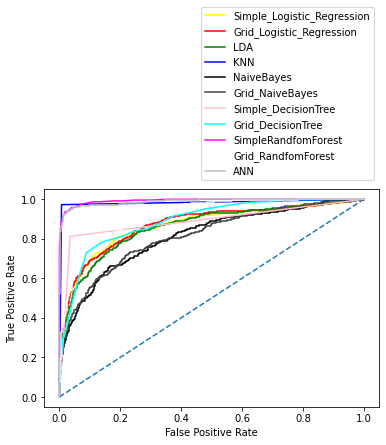

In [162]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_sm_lg,test_tpr_sm_lg,color='yellow',label="Simple_Logistic_Regression")
plt.plot(test_fpr_lg,test_tpr_lg,color='red',label="Grid_Logistic_Regression")
plt.plot(test_fpr_lda,test_tpr_lda,color='green',label="LDA")
plt.plot(test_fpr_knn,test_tpr_knn,color='blue',label="KNN")
plt.plot(test_fpr_sm_nb,test_tpr_sm_nb,color='black',label="NaiveBayes")
plt.plot(test_fpr_nb,test_tpr_nb,color='0.25',label="Grid_NaiveBayes")
plt.plot(test_fpr_sm_dt,test_tpr_sm_dt,color='pink',label="Simple_DecisionTree")
plt.plot(test_fpr_dt,test_tpr_dt,color='cyan',label="Grid_DecisionTree")
plt.plot(test_fpr_sm_rf,test_tpr_sm_rf,color='magenta',label="SimpleRandfomForest")
plt.plot(test_fpr_rf,test_tpr_rf,color='white',label="Grid_RandfomForest")
plt.plot(test_fpr_ann,test_tpr_ann,color='0.75',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# Ensemble Tecniques


Ensemble model is a technique which uses multiple models to make some prediction.

For an example: Random Forest is an ensemble technique because it uses multiple decesion trees.

We need ensemble techniques because models can be influences by noise and variances, so to overcome this ensemble methods are used.

Bagging and Boosting are two most widely used methods in Ensemble Techniques

# Bagging on Logistic Regression

In [163]:
Bagging_model = BaggingClassifier(LogisticRegression(), 
                  n_estimators=10, 
                  bootstrap = True, random_state = 1)
Bagging_model.fit(X_train,Y_train)

y_train_predict_bagging = Bagging_model.predict(X_train)
y_test_predict_bagging = Bagging_model.predict(X_test)


# Boosting

In [164]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

y_train_predict_adb = ADB_model.predict(X_train)
y_test_predict_adb = ADB_model.predict(X_test)

                              Important
Tenure                         0.304448
cashback                       0.074712
Day_Since_CC_connect           0.069237
rev_growth_yoy                 0.065955
CC_Agent_Score                 0.061272
Complain_ly_Yes/No             0.059661
rev_per_month                  0.044883
City_Tier                      0.041693
CC_Contacted_LY                0.040400
Marital_Status_Single          0.032852
Login_Device_Mobile            0.029094
Gender_Male                    0.024805
Payment_Debit_Card             0.023525
Account_user_count             0.019080
Marital_Status_Married         0.018113
Service_Score                  0.018081
account_segment_Super          0.015776
Payment_Credit_Card            0.013567
coupon_used_for_payment        0.012997
account_segment_Regular_Plus   0.009069
Payment_E_wallet               0.007182
account_segment_Regular        0.006868
Payment_UPI                    0.005767
account_segment_Super_Plus     0.000965


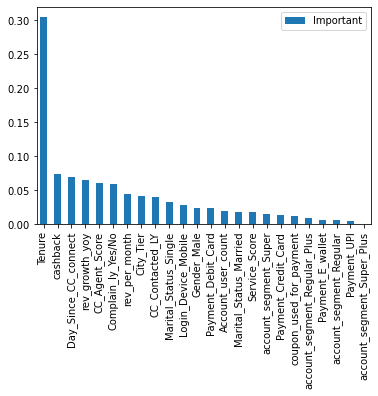

In [165]:
pd.DataFrame(ADB_model.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False).plot(kind='bar');
print(pd.DataFrame(ADB_model.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False))

# Gradient Boosting

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, Y_train)


y_train_predict_gbcl = gbcl.predict(X_train)
y_test_predict_gbcl = gbcl.predict(X_test)

# Performance Metrics for Ensemble Techniques

Bagging

Train

In [167]:
model_score_bag_lg_train = Bagging_model.score(X_train,Y_train)
model_score_bag_lg_train

0.8845470692717584

In [168]:
print(classification_report(Y_train,y_train_predict_bagging));

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7023
           1       0.75      0.48      0.58      1422

    accuracy                           0.88      8445
   macro avg       0.82      0.72      0.76      8445
weighted avg       0.88      0.88      0.87      8445



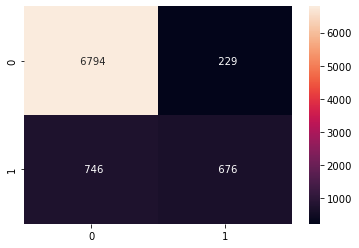

In [169]:
sns.heatmap(confusion_matrix(Y_train,y_train_predict_bagging),annot=True,fmt='5g');

AUC: 0.875


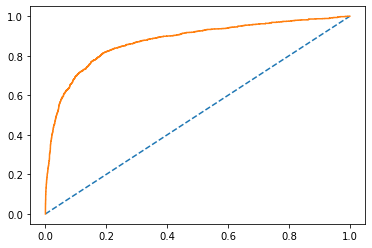

In [170]:
probs=Bagging_model.predict_proba(X_train)
probs=probs[:,1]
auc_bagging_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_bagging_train)
train_fpr_bagging,train_tpr_bagging,train_thershold_bagging=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_bagging,train_tpr_bagging);

Test

In [171]:
model_score_bagging = Bagging_model.score(X_test,Y_test)
model_score_bagging

0.8852575488454707

In [172]:
print(classification_report(Y_test,y_test_predict_bagging));

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2341
           1       0.75      0.47      0.58       474

    accuracy                           0.89      2815
   macro avg       0.83      0.72      0.76      2815
weighted avg       0.88      0.89      0.87      2815



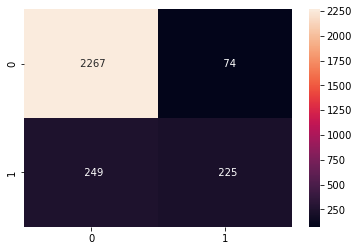

In [173]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_bagging),annot=True,fmt='5g');

AUC: 0.868


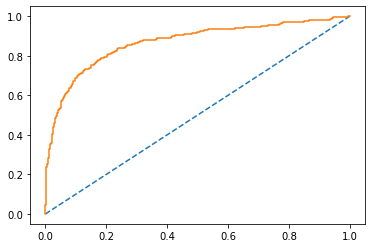

In [174]:
probs=Bagging_model.predict_proba(X_test)
probs=probs[:,1]
auc_bagging_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_bagging_test)
test_fpr_bagging,test_tpr_bagging,test_thershold_bagging=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_bagging,test_tpr_bagging);

# ADA Boosting

Train

In [175]:
model_score_boost_train = ADB_model.score(X_train,Y_train)
model_score_boost_train

1.0

In [176]:
print(classification_report(Y_train,y_train_predict_adb));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445



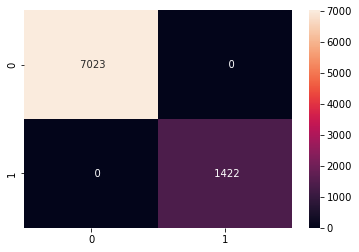

In [177]:
sns.heatmap(confusion_matrix(Y_train,y_train_predict_adb),annot=True,fmt='5g');

AUC: 1.000


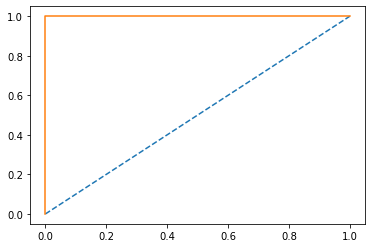

In [178]:
probs=ADB_model.predict_proba(X_train)
probs=probs[:,1]
auc_adb_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_adb_train)
train_fpr_adb,train_tpr_adb,train_thershold_adb=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_adb,train_tpr_adb);

Test

In [179]:
model_score_boost_test = ADB_model.score(X_test,Y_test)
model_score_boost_test

0.9428063943161634

In [180]:
print(classification_report(Y_test,y_test_predict_adb));

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2341
           1       0.83      0.83      0.83       474

    accuracy                           0.94      2815
   macro avg       0.90      0.90      0.90      2815
weighted avg       0.94      0.94      0.94      2815



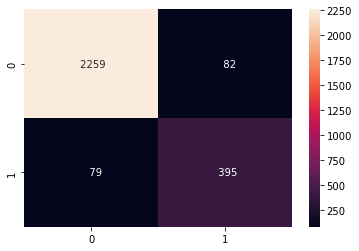

In [181]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_adb),annot=True,fmt='5g');

AUC: 0.899


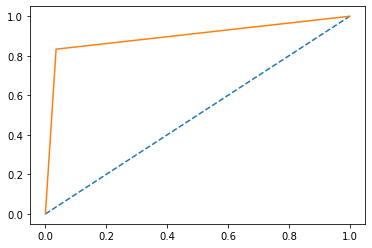

In [182]:
probs=ADB_model.predict_proba(X_test)
probs=probs[:,1]
auc_adb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_adb_test)
test_fpr_adb,test_tpr_adb,test_thershold_adb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_adb,test_tpr_adb);

# Gradient Boosting

Train

In [183]:
model_score_gbc_train = gbcl.score(X_train,Y_train)
model_score_gbc_train

0.9181764357608052

In [184]:
print(classification_report(Y_train,y_train_predict_gbcl));

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7023
           1       0.84      0.64      0.72      1422

    accuracy                           0.92      8445
   macro avg       0.88      0.81      0.84      8445
weighted avg       0.91      0.92      0.91      8445



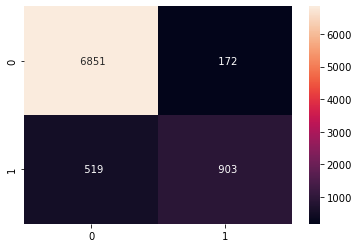

In [185]:
sns.heatmap(confusion_matrix(Y_train,y_train_predict_gbcl),annot=True,fmt='5g');

AUC: 0.947


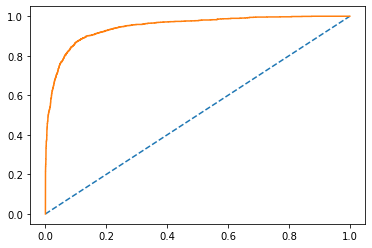

In [186]:
probs=gbcl.predict_proba(X_train)
probs=probs[:,1]
auc_gbcl_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_gbcl_train)
train_fpr_gbcl,train_tpr_gbcl,train_thershold_gbcl=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_gbcl,train_tpr_gbcl);

Test

In [187]:
model_score_gbc_test = gbcl.score(X_test,Y_test)
model_score_gbc_test

0.9150976909413855

In [188]:
print(classification_report(Y_test,y_test_predict_gbcl));

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2341
           1       0.84      0.62      0.71       474

    accuracy                           0.92      2815
   macro avg       0.88      0.80      0.83      2815
weighted avg       0.91      0.92      0.91      2815



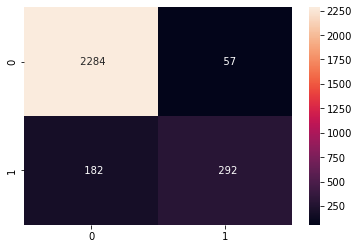

In [189]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_gbcl),annot=True,fmt='5g');

AUC: 0.927


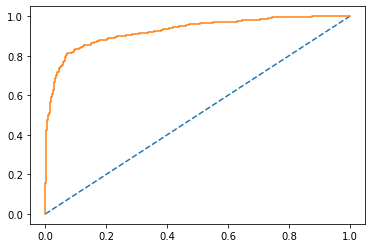

In [190]:
probs=gbcl.predict_proba(X_test)
probs=probs[:,1]
auc_gbcl_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_gbcl_test)
test_fpr_gbcl,test_tpr_gbcl,test_thershold_gbcl=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_gbcl,test_tpr_gbcl);

# Performance comparisions

In [191]:
train_scores=[0.89,0.89,0.89,1.00,0.78,0.87,1.00,0.88,1.00,0.89,1.00,0.88,1.00,0.92]
test_scores=[0.89,0.89,0.88,0.99,0.77,0.86,0.94,0.88,0.97,0.89,0.97,0.89,0.94,0.92]
recall_train=[0.49,0.50,0.46,1.00,0.72,0.48,1.00,0.58,1.00,0.53,0.98,0.48,1.00,0.64]
recall_test=[0.49,0.48,0.45,0.97,0.68,0.43,0.81,0.57,0.82,0.53,0.88,0.47,0.83,0.62]
precision_train=[0.75,0.78,0.76,1.00,0.41,0.65,1.00,0.67,1.00,0.76,1.00,0.75,1.00,0.84]
precision_test=[0.77,0.76,0.74,0.97,0.39,0.65,0.82,0.67,0.98,0.76,0.96,0.75,0.83,0.84]
f1score_train=[0.60,0.61,0.58,1.00,0.52,0.55,1.00,0.62,1.00,0.62,0.99,0.58,1.00,0.72]
f1score_test=[0.60,0.59,0.56,0.97,0.50,0.52,0.82,0.62,0.90,0.63,0.92,0.58,0.83,0.71]
auc_train=[0.874,0.882,0.873,1.000,0.818,0.814,1.000,0.909,1.000,0.930,1.000,0.875,1.000,0.947]
auc_test=[0.869,0.873,0.860,0.983,0.812,0.814,0.888,0.891,0.993,0.920,0.988,0.868,0.899,0.927]
performance_comp=(pd.DataFrame({'Train_Accuracy': train_scores,'Test_Accuracy': test_scores,'Train_Recall':recall_train,'Test_Recall': recall_test,'Train_precision':precision_train,'Test_precision': precision_test,'Train_f1':f1score_train,'Test_f1': f1score_test,'Train_AUC':auc_train,'Test_AUC': auc_test},
            index=['LogisticRegression','Regularization_LGR','LinearDiscrminantAnalysis','KNN','NaiveBayes',
                   'Grid_NaiveBayes','DecisionTree','Grid_DecisionTree','RandomForest','Grid_RandomForest',
                   'ArtificialNeuralNetwork','Bagging_LGR','ADABoosting_DecisionTree','GradientBoosting']))

#performance_comp.iloc[0:7,:].T 
performance_comp


Train_Accuracy  Test_Accuracy  Train_Recall  \
LogisticRegression                   0.89           0.89          0.49   
Regularization_LGR                   0.89           0.89          0.50   
LinearDiscrminantAnalysis            0.89           0.88          0.46   
KNN                                  1.00           0.99          1.00   
NaiveBayes                           0.78           0.77          0.72   
Grid_NaiveBayes                      0.87           0.86          0.48   
DecisionTree                         1.00           0.94          1.00   
Grid_DecisionTree                    0.88           0.88          0.58   
RandomForest                         1.00           0.97          1.00   
Grid_RandomForest                    0.89           0.89          0.53   
ArtificialNeuralNetwork              1.00           0.97          0.98   
Bagging_LGR                          0.88           0.89          0.48   
ADABoosting_DecisionTree             1.00           0.94          1.00   
GradientBoosting                     0.92           0.92          0.64   

                           Test_Recall  Train_precision  Test_precision  \
LogisticRegression                0.49             0.75            0.77   
Regularization_LGR                0.48             0.78            0.76   
LinearDiscrminantAnalysis         0.45             0.76            0.74   
KNN                               0.97             1.00            0.97   
NaiveBayes                        0.68             0.41            0.39   
Grid_NaiveBayes                   0.43             0.65            0.65   
DecisionTree                      0.81             1.00            0.82   
Grid_DecisionTree                 0.57             0.67            0.67   
RandomForest                      0.82             1.00            0.98   
Grid_RandomForest                 0.53             0.76            0.76   
ArtificialNeuralNetwork           0.88             1.00            0.96   
Bagging_LGR                       0.47             0.75            0.75   
ADABoosting_DecisionTree          0.83             1.00            0.83   
GradientBoosting                  0.62             0.84            0.84   

                           Train_f1  Test_f1  Train_AUC  Test_AUC  
LogisticRegression             0.60     0.60      0.874     0.869  
Regularization_LGR             0.61     0.59      0.882     0.873  
LinearDiscrminantAnalysis      0.58     0.56      0.873     0.860  
KNN                            1.00     0.97      1.000     0.983  
NaiveBayes                     0.52     0.50      0.818     0.812  
Grid_NaiveBayes                0.55     0.52      0.814     0.814  
DecisionTree                   1.00     0.82      1.000     0.888  
Grid_DecisionTree              0.62     0.62      0.909     0.891  
RandomForest                   1.00     0.90      1.000     0.993  
Grid_RandomForest              0.62     0.63      0.930     0.920  
ArtificialNeuralNetwork        0.99     0.92      1.000     0.988  
Bagging_LGR                    0.58     0.58      0.875     0.868  
ADABoosting_DecisionTree       1.00     0.83      1.000     0.899  
GradientBoosting               0.72     0.71      0.947     0.927

# SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=40)
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)

# Logistic Regression

In [193]:
sm_lgr=LogisticRegression()
sm_lgr.fit(X_train_smote,Y_train_smote)
sm_lgr_predict_train = sm_lgr.predict(X_train_smote)
sm_lgr_predict_test=sm_lgr.predict(X_test)

Performance Matrics

Train

In [194]:
sm_lgr_train_score=sm_lgr.score(X_train_smote,Y_train_smote)
sm_lgr_train_score

0.826498647301723

In [195]:
print(classification_report(Y_train_smote,sm_lgr_predict_train));

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7023
           1       0.82      0.83      0.83      7023

    accuracy                           0.83     14046
   macro avg       0.83      0.83      0.83     14046
weighted avg       0.83      0.83      0.83     14046



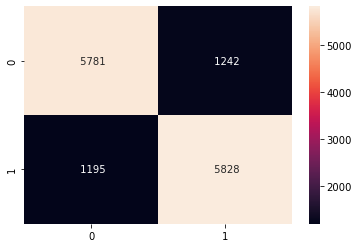

In [196]:
sns.heatmap(confusion_matrix(Y_train_smote,sm_lgr_predict_train),annot=True,fmt='5g');

AUC: 0.907


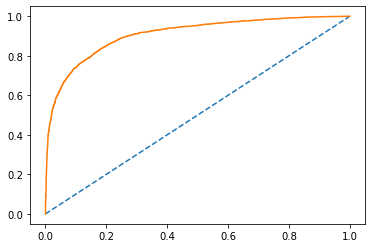

In [197]:
probs=sm_lgr.predict_proba(X_train_smote)
probs=probs[:,1]
auc_sm_lgr_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_sm_lgr_train)
train_fpr_sm_lgr,train_tpr_sm_lgr,train_thershold_sm_lgr=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_sm_lgr,train_tpr_sm_lgr);

Test

In [198]:
sm_lgr_test_score=sm_lgr.score(X_test,Y_test)
sm_lgr_test_score

0.8078152753108349

In [199]:
print(classification_report(Y_test,sm_lgr_predict_test));

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2341
           1       0.45      0.70      0.55       474

    accuracy                           0.81      2815
   macro avg       0.69      0.76      0.71      2815
weighted avg       0.85      0.81      0.82      2815



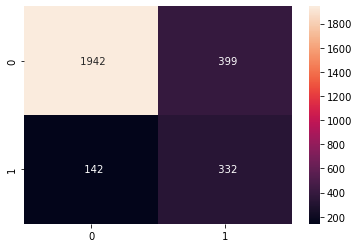

In [200]:
sns.heatmap(confusion_matrix(Y_test,sm_lgr_predict_test),annot=True,fmt='5g');

AUC: 0.841


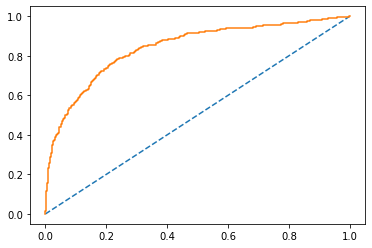

In [201]:
probs=sm_lgr.predict_proba(X_test)
probs=probs[:,1]
auc_sm_lgr_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_sm_lgr_test)
test_fpr_sm_lgr,test_tpr_sm_lgr,test_thershold_sm_lgr=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_sm_lgr,test_tpr_sm_lgr);

# Regularized Logistic Regression

In [202]:
x_train_scale=X_train.apply(zscore)
x_test_scale=X_test.apply(zscore)

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=40)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scale, Y_train)


grid_search.fit(x_train_smote, y_train_smote)
best_model=grid_search.best_estimator_
train_predict_lg_smt=best_model.predict(x_train_smote)
test_predict_lg_smt=best_model.predict(x_test_scale)

Train Data

In [203]:
LGR_Scores_train_smote=best_model.score(x_train_smote,y_train_smote)
LGR_Scores_train_smote

0.8101238786843229

In [204]:
print(classification_report(y_train_smote,train_predict_lg_smt));

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      7023
           1       0.80      0.83      0.81      7023

    accuracy                           0.81     14046
   macro avg       0.81      0.81      0.81     14046
weighted avg       0.81      0.81      0.81     14046



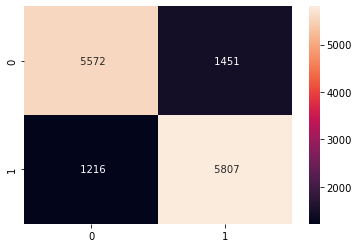

In [205]:
sns.heatmap(confusion_matrix(y_train_smote,train_predict_lg_smt),annot=True,fmt='5g');

AUC: 0.887


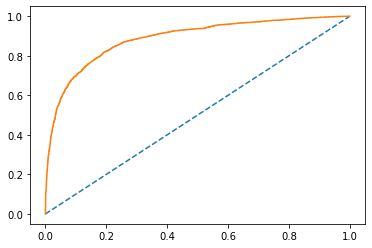

In [206]:
probs=best_model.predict_proba(x_train_smote)
probs=probs[:,1]
auc_grid_lgr_train=roc_auc_score(y_train_smote,probs)
print('AUC: %.3f' %auc_grid_lgr_train)
train_fpr_grid_lgr,train_tpr_grid_lgr,train_thershold_grid_lgr=roc_curve(y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_grid_lgr,train_tpr_grid_lgr);

Test

In [207]:
LGR_Scores_test_smote=best_model.score(x_test_scale,Y_test)
LGR_Scores_test_smote

0.7939609236234458

In [208]:
print(classification_report(Y_test,test_predict_lg_smt));

              precision    recall  f1-score   support

           0       0.95      0.79      0.87      2341
           1       0.44      0.79      0.56       474

    accuracy                           0.79      2815
   macro avg       0.69      0.79      0.71      2815
weighted avg       0.86      0.79      0.81      2815



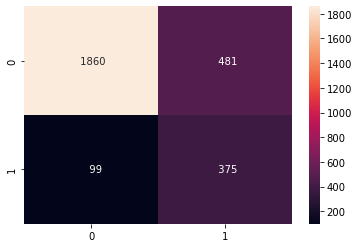

In [209]:
sns.heatmap(confusion_matrix(Y_test,test_predict_lg_smt),annot=True,fmt='5g');

AUC: 0.873


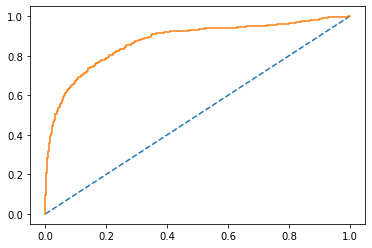

In [210]:
probs=best_model.predict_proba(x_test_scale)
probs=probs[:,1]
auc_grid_lgr_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_grid_lgr_test)
test_fpr_grid_lgr,test_tpr_grid_lgr,test_thershold_grid_lgr=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_grid_lgr,test_tpr_grid_lgr);

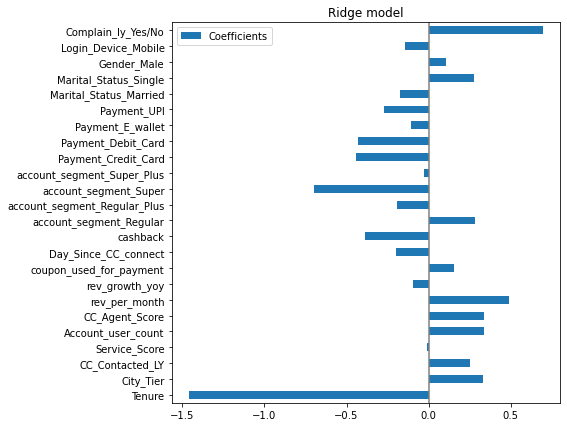

In [211]:
coefs = pd.DataFrame(
   best_model.coef_[0],
   columns=['Coefficients'], index=x_train_smote.columns
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# LDA

In [212]:
best_model_lda=lda.fit(X_train_smote, Y_train_smote)

train_lda=best_model_lda.predict(X_train_smote)
test_lda=best_model_lda.predict(X_test)

Performance Metrics

Train

In [213]:
LDA_Scores_train_smote=best_model_lda.score(X_train_smote,Y_train_smote)
LDA_Scores_train_smote

0.8395984621956429

In [214]:
print(classification_report(Y_train_smote,train_lda))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7023
           1       0.84      0.83      0.84      7023

    accuracy                           0.84     14046
   macro avg       0.84      0.84      0.84     14046
weighted avg       0.84      0.84      0.84     14046



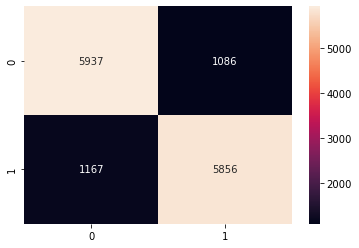

In [215]:
sns.heatmap(confusion_matrix(Y_train_smote,train_lda),annot=True,fmt='.5g');

AUC: 0.918


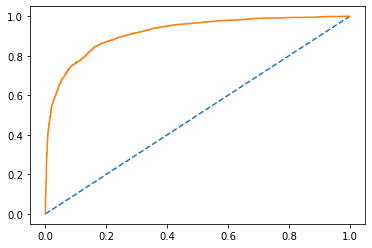

In [216]:
probs=best_model_lda.predict_proba(X_train_smote)
probs=probs[:,1]
auc_lda_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_lda_train)
train_fpr_lda,train_tpr_lda,train_thershold_lda=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_lda,train_tpr_lda);

Test

In [217]:
LDA_Scores_test_smote=best_model_lda.score(X_test,Y_test)
LDA_Scores_test_smote

0.8174067495559503

In [219]:
print(classification_report(Y_test,test_lda))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2341
           1       0.47      0.70      0.56       474

    accuracy                           0.82      2815
   macro avg       0.70      0.77      0.72      2815
weighted avg       0.85      0.82      0.83      2815



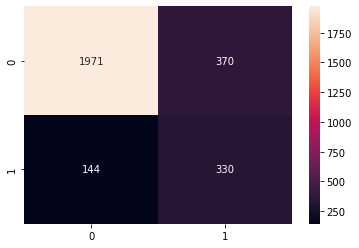

In [221]:
sns.heatmap(confusion_matrix(Y_test,test_lda),annot=True,fmt='.5g');

AUC: 0.842


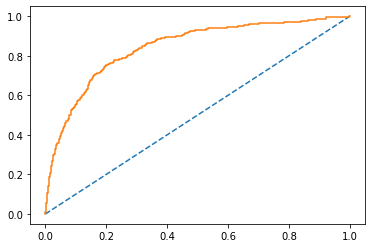

In [222]:
probs=best_model_lda.predict_proba(X_test)
probs=probs[:,1]
auc_lda_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_lda_test)
test_fpr_lda,test_tpr_lda,test_thershold_lda=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_lda,test_tpr_lda);

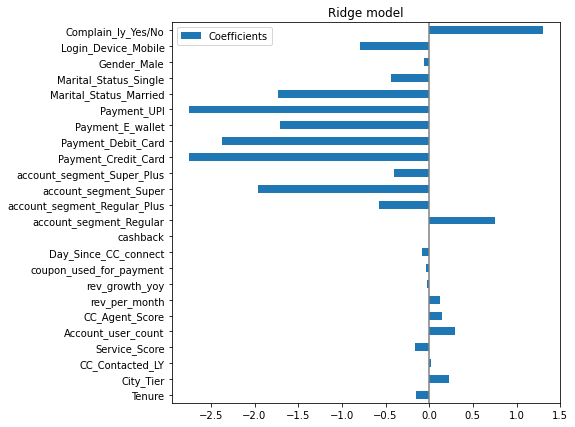

In [223]:
coefs = pd.DataFrame(
   best_model_lda.coef_[0],
   columns=['Coefficients'], index=X_train_smote.columns
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Decesion tree

In [224]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_smote,Y_train_smote)
train_predict_sm_dt_smote = dt.predict(X_train_smote)
test_predict_sm_dt_smote = dt.predict(X_test)

Performance metrics

Train

In [225]:
score_sm_dt_train_smote = dt.score(X_train_smote,Y_train_smote)
score_sm_dt_train_smote

1.0

In [226]:
print(classification_report(Y_train_smote,train_predict_sm_dt_smote));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



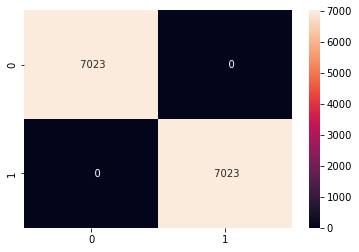

In [227]:
sns.heatmap(confusion_matrix(Y_train_smote,train_predict_sm_dt_smote),annot=True,fmt='5g');

AUC: 1.000


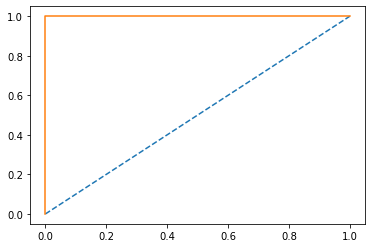

In [228]:
probs=dt.predict_proba(X_train_smote)
probs=probs[:,1]
auc_dt_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_dt_train)
train_fpr_dt,train_tpr_dt,train_thershold_dt=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_dt,train_tpr_dt);

Test

In [229]:
score_sm_dt_test_smote = dt.score(X_test,Y_test)
score_sm_dt_test_smote

0.9239786856127886

In [230]:
print(classification_report(Y_test,test_predict_sm_dt_smote));

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2341
           1       0.75      0.82      0.78       474

    accuracy                           0.92      2815
   macro avg       0.86      0.88      0.87      2815
weighted avg       0.93      0.92      0.93      2815



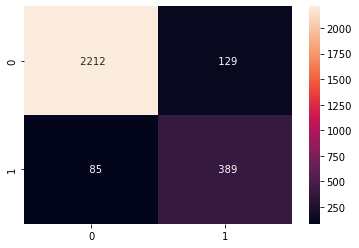

In [231]:
sns.heatmap(confusion_matrix(Y_test,test_predict_sm_dt_smote),annot=True,fmt='5g');

AUC: 0.883


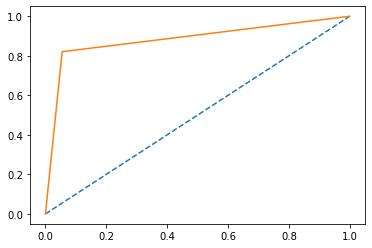

In [233]:
probs=dt.predict_proba(X_test)
probs=probs[:,1]
auc_dt_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_dt_test)
test_fpr_dt,test_tpr_dt,test_thershold_dt=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_dt,test_tpr_dt);

# Grid search Decesion tree

In [234]:
grid_search_dt_model.fit(X_train_smote,Y_train_smote)

grid_search_dt_model.best_params_
best_grid_dt = grid_search_dt_model.best_estimator_
print(best_grid_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=250, random_state=1)


In [235]:
ytrain_predict_dt = best_grid_dt.predict(X_train_smote)
ytest_predict_dt = best_grid_dt.predict(X_test)

**performance metrics**

Train

In [236]:
model_score_dt_train_smote = best_grid_dt.score(X_train_smote,Y_train_smote)
model_score_dt_train_smote

0.8692154349992881

In [237]:
print(metrics.classification_report(Y_train_smote,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7023
           1       0.87      0.87      0.87      7023

    accuracy                           0.87     14046
   macro avg       0.87      0.87      0.87     14046
weighted avg       0.87      0.87      0.87     14046



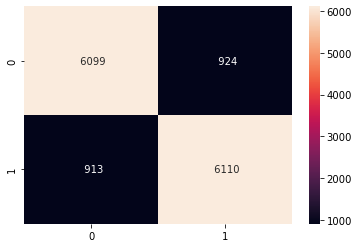

In [238]:
sns.heatmap(confusion_matrix(Y_train_smote,ytrain_predict_dt),annot=True,fmt='5g');

AUC: 0.946


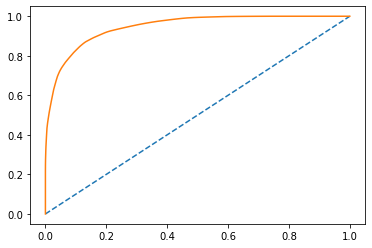

In [239]:
probs=best_grid_dt.predict_proba(X_train_smote)
probs=probs[:,1]
auc_grid_dt_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_grid_dt_train)
train_fpr_grid_dt,train_tpr_grid_dt,train_thershold_grid_dt=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_grid_dt,train_tpr_grid_dt);

Test

In [240]:
model_score_dt_test_smote = best_grid_dt.score(X_test,Y_test)
model_score_dt_test_smote

0.852930728241563

In [241]:
print(classification_report(Y_test,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2341
           1       0.55      0.72      0.62       474

    accuracy                           0.85      2815
   macro avg       0.74      0.80      0.77      2815
weighted avg       0.87      0.85      0.86      2815



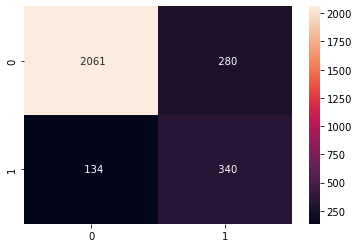

In [242]:
sns.heatmap(confusion_matrix(Y_test,ytest_predict_dt),annot=True,fmt='5g');

AUC: 0.886


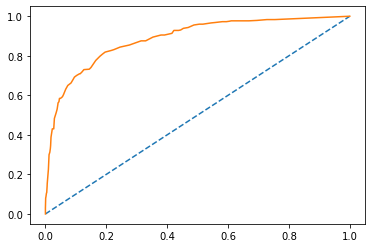

In [243]:
probs=best_grid_dt.predict_proba(X_test)
probs=probs[:,1]
auc_grid_dt_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_grid_dt_test)
test_fpr_grid_dt,test_tpr_grid_dt,test_thershold_grid_dt=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_grid_dt,test_tpr_grid_dt);

                              Important
Tenure                         0.501277
Marital_Status_Married         0.083965
Payment_Credit_Card            0.062553
Payment_Debit_Card             0.055416
Complain_ly_Yes/No             0.038887
Payment_UPI                    0.036125
account_segment_Super          0.033215
cashback                       0.024707
Payment_E_wallet               0.020904
CC_Agent_Score                 0.020460
Day_Since_CC_connect           0.020081
CC_Contacted_LY                0.018870
rev_per_month                  0.016909
Marital_Status_Single          0.016223
rev_growth_yoy                 0.014506
Login_Device_Mobile            0.012090
Account_user_count             0.009382
account_segment_Regular_Plus   0.007385
coupon_used_for_payment        0.003214
Gender_Male                    0.002615
City_Tier                      0.001216
Service_Score                  0.000000
account_segment_Regular        0.000000
account_segment_Super_Plus     0.000000


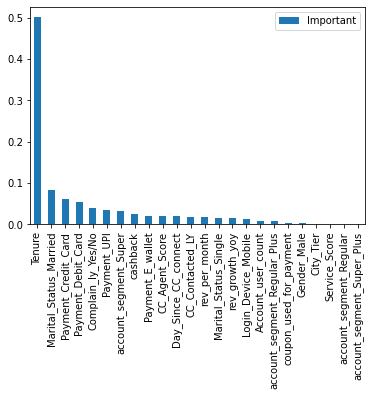

In [244]:
pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Important"], 
                    index = X_train_smote.columns).sort_values('Important',ascending=False).plot(kind='bar');
print(pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Important"], 
                    index = X_train_smote.columns).sort_values('Important',ascending=False))

# Naive Bayes

In [245]:
model_nb= GaussianNB()
model_nb.fit(X_train_smote,Y_train_smote)
model_nb_predict_train = model_nb.predict(X_train_smote)
model_nb_predict_test = model_nb.predict(X_test)

Performance Metrics

Train

In [246]:
model_nb_train_score_smote = model_nb.score(X_train_smote,Y_train_smote)
model_nb_train_score_smote

0.7494660401537805

In [247]:
print(classification_report(Y_train_smote,model_nb_predict_train));

              precision    recall  f1-score   support

           0       0.81      0.66      0.72      7023
           1       0.71      0.84      0.77      7023

    accuracy                           0.75     14046
   macro avg       0.76      0.75      0.75     14046
weighted avg       0.76      0.75      0.75     14046



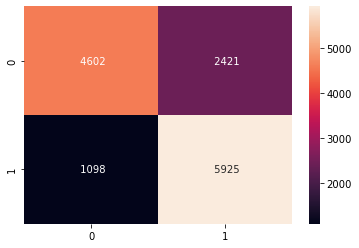

In [248]:
sns.heatmap(confusion_matrix(Y_train_smote,model_nb_predict_train),annot=True,fmt='5g');

AUC: 0.839


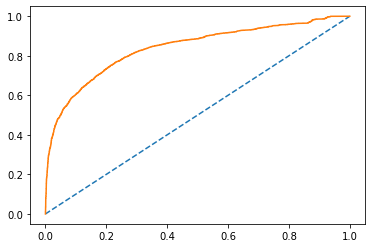

In [249]:
probs=model_nb.predict_proba(X_train_smote)
probs=probs[:,1]
auc_nb_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_nb_train)
train_fpr_nb,train_tpr_nb,train_thershold_nb=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_nb,train_tpr_nb);

Test

In [250]:
model_nb_test_score_smote = model_nb.score(X_test,Y_test)
model_nb_test_score_smote

0.6657193605683837

In [251]:
print(classification_report(Y_test,model_nb_predict_test));

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      2341
           1       0.29      0.70      0.41       474

    accuracy                           0.67      2815
   macro avg       0.61      0.68      0.59      2815
weighted avg       0.81      0.67      0.71      2815



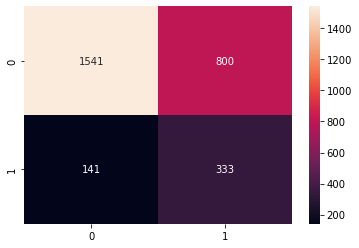

In [253]:
sns.heatmap(confusion_matrix(Y_test,model_nb_predict_test),annot=True,fmt='.5g');

AUC: 0.748


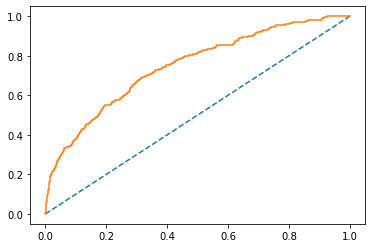

In [254]:
probs=model_nb.predict_proba(X_test)
probs=probs[:,1]
auc_nb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_nb_test)
test_fpr_nb,test_tpr_nb,test_thershold_nb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_nb,test_tpr_nb);

# Grid Paramters Naive Bayes

In [255]:
nbModel_grid.fit(X_train_smote, Y_train_smote)
print(nbModel_grid.best_estimator_)

nbModel_grid.best_params_

best_model_nb = nbModel_grid.best_estimator_
best_model_nb

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:    9.0s


GaussianNB(var_smoothing=1.873817422860383e-05)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   10.9s finished


GaussianNB(var_smoothing=1.873817422860383e-05)

In [257]:
train_nb=best_model_nb.predict(X_train_smote)
test_nb=best_model_nb.predict(X_test)

Performance Metrics

Train

In [258]:
model_score_bayes_train = best_model_nb.score(X_train_smote, Y_train_smote)
model_score_bayes_train

0.7585077602164317

In [259]:
print(metrics.classification_report(Y_train_smote,train_nb));

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      7023
           1       0.72      0.84      0.78      7023

    accuracy                           0.76     14046
   macro avg       0.76      0.76      0.76     14046
weighted avg       0.76      0.76      0.76     14046



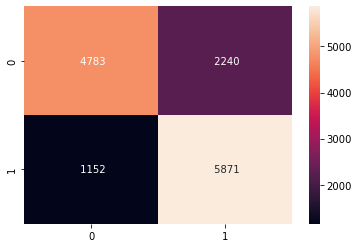

In [260]:
sns.heatmap(confusion_matrix(Y_train_smote,train_nb),annot=True,fmt='5g');

AUC: 0.847


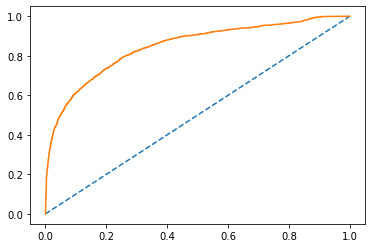

In [261]:
probs=best_model_nb.predict_proba(X_train_smote)
probs=probs[:,1]
auc_nb_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_nb_train)
train_fpr_nb,train_tpr_nb,train_thershold_nb=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_nb,train_tpr_nb);

Test

In [262]:
model_score_bayes_test = best_model_nb.score(X_test, Y_test)
model_score_bayes_test

0.6873889875666075

In [263]:
print(metrics.classification_report(Y_test,test_nb));

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      2341
           1       0.31      0.72      0.44       474

    accuracy                           0.69      2815
   macro avg       0.62      0.70      0.61      2815
weighted avg       0.82      0.69      0.73      2815



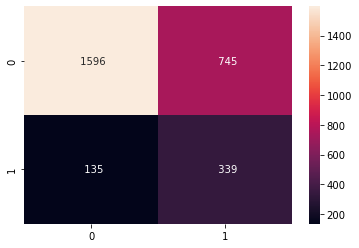

In [264]:
sns.heatmap(confusion_matrix(Y_test,test_nb),annot=True,fmt='5g');

AUC: 0.774


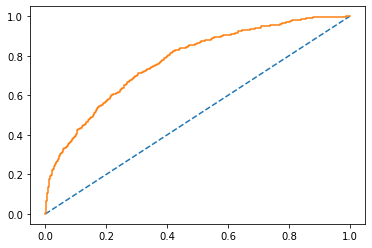

In [265]:
probs=best_model_nb.predict_proba(X_test)
probs=probs[:,1]
auc_nb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_nb_test)
test_fpr_nb,test_tpr_nb,test_thershold_nb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_nb,test_tpr_nb);

# Random Forest

In [22]:
rf.fit(X_train_smote,Y_train_smote)

sm_rf_predict_train = rf.predict(X_train_smote)

sm_rf_predict_test = rf.predict(X_test)

Performance metrics

Train

In [267]:
sm_rf_train_score_smote = rf.score(X_train_smote,Y_train_smote)
sm_rf_train_score_smote

1.0

In [268]:
print(classification_report(Y_train_smote,sm_rf_predict_train));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



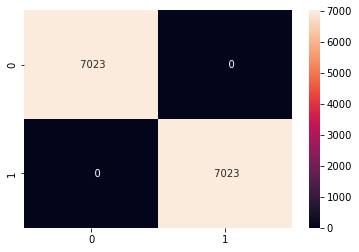

In [269]:
sns.heatmap(confusion_matrix(Y_train_smote,sm_rf_predict_train),annot=True,fmt='5g')

AUC: 0.946


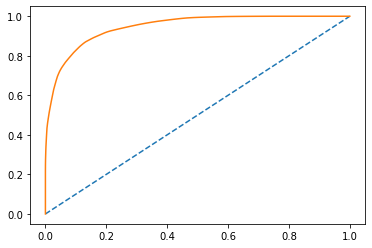

In [270]:
probs=best_grid_dt.predict_proba(X_train_smote)
probs=probs[:,1]
auc_sm_rf_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_sm_rf_train)
train_fpr_sm_rf,train_tpr_sm_rf,train_thershold_sm_rf=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_sm_rf,train_tpr_sm_rf);

Test

In [271]:
sm_rf_test_score_smote = rf.score(X_test,Y_test)
sm_rf_test_score_smote

0.9676731793960923

In [272]:
print(classification_report(Y_test,sm_rf_predict_test));

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2341
           1       0.93      0.87      0.90       474

    accuracy                           0.97      2815
   macro avg       0.95      0.93      0.94      2815
weighted avg       0.97      0.97      0.97      2815



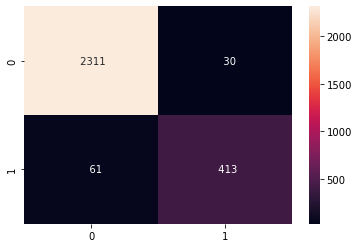

In [273]:
sns.heatmap(confusion_matrix(Y_test,sm_rf_predict_test),annot=True,fmt='5g');

AUC: 0.988


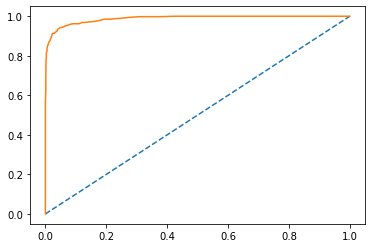

In [274]:
probs=rf.predict_proba(X_test)
probs=probs[:,1]
auc_sm_rf_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_sm_rf_test)
test_fpr_sm_rf,test_tpr_sm_rf,test_thershold_sm_rf=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_sm_rf,test_tpr_sm_rf);

# Random Forest Grid Search

In [275]:
grid_search_rfcl.fit(X_train_smote,Y_train_smote)

grid_search_rfcl.best_params_

best_grid_rfcl=grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=14, max_features=5, min_samples_leaf=50,
                       min_samples_split=200, n_estimators=101, random_state=1)

In [276]:
train_rf=best_grid_rfcl.predict(X_train_smote)
test_rf=best_grid_rfcl.predict(X_test)

Performance metrics

Train

In [277]:
model_score_rf_train=best_grid_rfcl.score(X_train_smote,Y_train_smote)
model_score_rf_train

0.8736295030613698

In [278]:
print(classification_report(Y_train_smote,train_rf))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7023
           1       0.88      0.86      0.87      7023

    accuracy                           0.87     14046
   macro avg       0.87      0.87      0.87     14046
weighted avg       0.87      0.87      0.87     14046



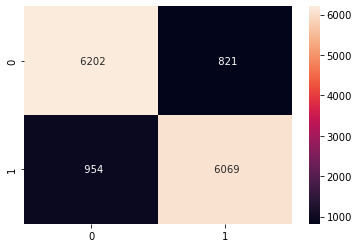

In [283]:
sns.heatmap(confusion_matrix(Y_train_smote,train_rf),annot=True,fmt='5g');

AUC: 0.953


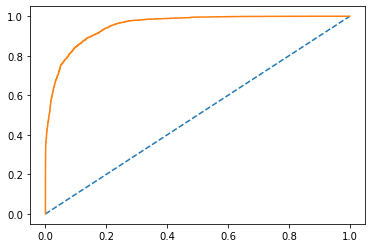

In [284]:
probs=best_grid_rfcl.predict_proba(X_train_smote)
probs=probs[:,1]
auc_rf_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_rf_train)
train_fpr_rf,train_tpr_rf,train_thershold_rf=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_rf,train_tpr_rf);

Test

In [285]:
model_score_rf_test=best_grid_rfcl.score(X_test,Y_test)
model_score_rf_test

0.8714031971580817

In [286]:
print(classification_report(Y_test,test_rf));

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2341
           1       0.59      0.75      0.66       474

    accuracy                           0.87      2815
   macro avg       0.77      0.82      0.79      2815
weighted avg       0.89      0.87      0.88      2815



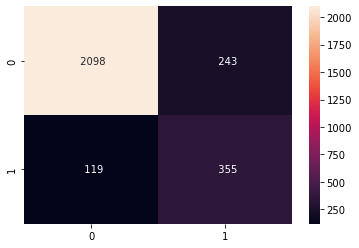

In [287]:
sns.heatmap(confusion_matrix(Y_test,test_rf),annot=True,fmt='5g');

AUC: 0.902


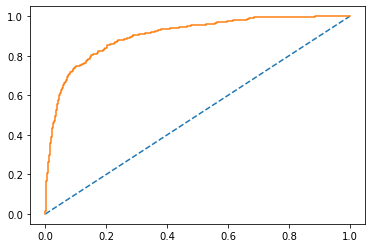

In [288]:
probs=best_grid_rfcl.predict_proba(X_test)
probs=probs[:,1]
auc_rf_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_rf_test)
test_fpr_rf,test_tpr_rf,test_thershold_rf=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_rf,test_tpr_rf);

                              Important
Tenure                         0.275932
cashback                       0.075770
Marital_Status_Married         0.072726
Day_Since_CC_connect           0.063099
CC_Contacted_LY                0.053442
rev_growth_yoy                 0.048951
Payment_Credit_Card            0.041363
rev_per_month                  0.041187
CC_Agent_Score                 0.040917
account_segment_Super          0.037332
Payment_Debit_Card             0.029904
Complain_ly_Yes/No             0.027930
Account_user_count             0.024723
Login_Device_Mobile            0.022659
coupon_used_for_payment        0.021243
City_Tier                      0.020663
Service_Score                  0.018691
account_segment_Regular_Plus   0.018217
Gender_Male                    0.017055
Marital_Status_Single          0.015395
Payment_UPI                    0.012460
account_segment_Super_Plus     0.008634
Payment_E_wallet               0.008204
account_segment_Regular        0.003503


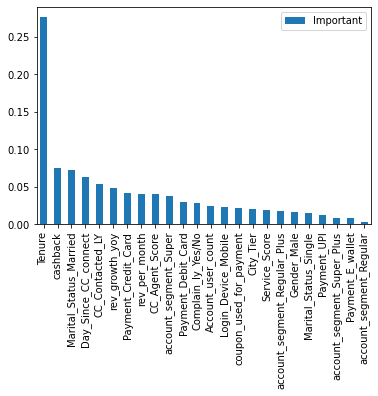

In [23]:
pd.DataFrame(rf.feature_importances_, columns = ["Important"], 
                    index = X_train_smote.columns).sort_values('Important',ascending=False).plot(kind='bar');
print(pd.DataFrame(rf.feature_importances_, columns = ["Important"], 
                    index = X_train_smote.columns).sort_values('Important',ascending=False))

# Artificial Neural Network

In [290]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=40)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scale, y_train)
ann=MLPClassifier(random_state=1)
ann.fit(x_train_smote,y_train_smote)

MLPClassifier(random_state=1)

In [291]:
ytrain_predict_ann = ann.predict(x_train_smote)
ytest_predict_ann = ann.predict(x_test_scale)

Performance Metrics

Train

In [292]:
model_score_ann_train=ann.score(x_train_smote,y_train_smote)
model_score_ann_train

0.9998576107076748

In [293]:
print(classification_report(y_train_smote,ytrain_predict_ann));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



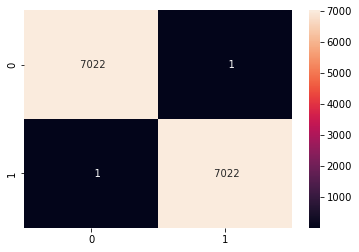

In [294]:
sns.heatmap(confusion_matrix(y_train_smote,ytrain_predict_ann),annot=True,fmt='5g');

AUC: 1.000


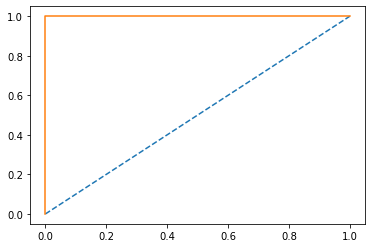

In [295]:
probs=ann.predict_proba(x_train_smote)
probs=probs[:,1]
auc_ann_train=roc_auc_score(y_train_smote,probs)
print('AUC: %.3f' %auc_ann_train)
train_fpr_ann,train_tpr_ann,train_thershold_ann=roc_curve(y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_ann,train_tpr_ann);

Test

In [296]:
model_score_ann_test=ann.score(x_test_scale,y_test)
model_score_ann_test

0.9722912966252221

In [297]:
print(classification_report(y_test,ytest_predict_ann));

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2341
           1       0.91      0.92      0.92       474

    accuracy                           0.97      2815
   macro avg       0.95      0.95      0.95      2815
weighted avg       0.97      0.97      0.97      2815



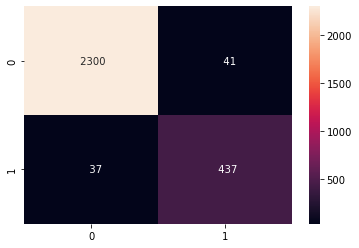

In [298]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_ann),annot=True,fmt='5g');

AUC: 0.990


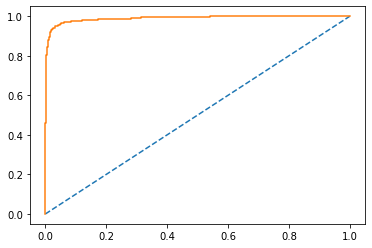

In [299]:
probs=ann.predict_proba(x_test_scale)
probs=probs[:,1]
auc_ann_test=roc_auc_score(y_test,probs)
print('AUC: %.3f' %auc_ann_test)
test_fpr_ann,test_tpr_ann,test_thershold_ann=roc_curve(y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_ann,test_tpr_ann);

# KNN

In [300]:
x_train_scale=X_train.apply(zscore)
x_test_scale=X_test.apply(zscore)

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=40)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scale, y_train)

k_range = list(range(3, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(metric='manhattan')
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_search_knn=knn_grid.fit(x_train_smote, y_train_smote)
best_model_knn = knn_grid.best_estimator_
best_model_knn

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  8.2min finished


KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [301]:
train_knn=best_model_knn.predict(x_train_smote)
test_knn=best_model_knn.predict(x_test_scale)

Performance metrics

Train

In [302]:
KNN_model_score_train= best_model_knn.score(x_train_smote, y_train_smote)
KNN_model_score_train

0.9970098248611704

In [303]:
print(metrics.classification_report(y_train_smote,train_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7023
           1       0.99      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



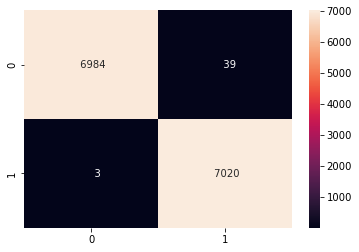

In [304]:
sns.heatmap(confusion_matrix(y_train_smote,train_knn),annot=True,fmt='5g');

AUC: 1.000


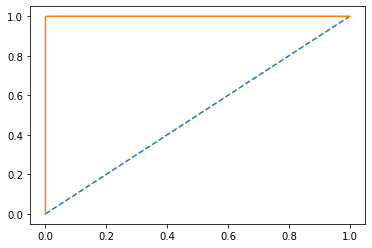

In [305]:
probs=best_model_knn.predict_proba(x_train_smote)
probs=probs[:,1]
auc_knn_train=roc_auc_score(y_train_smote,probs)
print('AUC: %.3f' %auc_knn_train)
train_fpr_knn,train_tpr_knn,train_thershold_knn=roc_curve(y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_knn,train_tpr_knn);

Test

In [306]:
KNN_model_score_test = best_model_knn.score(x_test_scale,y_test)
KNN_model_score_test

0.9811722912966252

In [307]:
print(metrics.classification_report(y_test,test_knn))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2341
           1       0.92      0.97      0.95       474

    accuracy                           0.98      2815
   macro avg       0.96      0.98      0.97      2815
weighted avg       0.98      0.98      0.98      2815



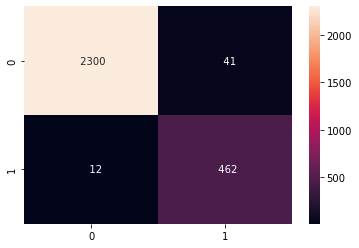

In [308]:
sns.heatmap(confusion_matrix(y_test,test_knn),annot=True,fmt='5g');

AUC: 0.994


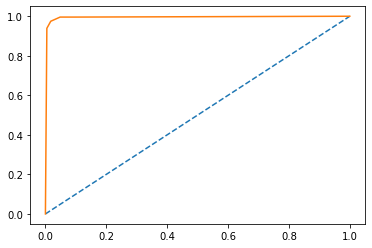

In [309]:
probs=best_model_knn.predict_proba(x_test_scale)
probs=probs[:,1]
auc_knn_test=roc_auc_score(y_test,probs)
print('AUC: %.3f' %auc_knn_test)
test_fpr_knn,test_tpr_knn,test_thershold_knn=roc_curve(y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_knn,test_tpr_knn);

# Ensemlbe Techniques

Bagging

In [310]:
Bagging_model = BaggingClassifier(LogisticRegression(), 
                  n_estimators=10, 
                  bootstrap = True, random_state = 1)
Bagging_model.fit(X_train_smote,Y_train_smote)

y_train_predict_bagging = Bagging_model.predict(X_train_smote)
y_test_predict_bagging = Bagging_model.predict(X_test)

Performance metrics

Train

In [311]:
bag_train_smote = Bagging_model.score(X_train_smote,Y_train_smote)
bag_train_smote

0.8250035597323081

In [312]:
print(classification_report(Y_train_smote,y_train_predict_bagging));

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7023
           1       0.82      0.83      0.83      7023

    accuracy                           0.83     14046
   macro avg       0.83      0.83      0.82     14046
weighted avg       0.83      0.83      0.82     14046



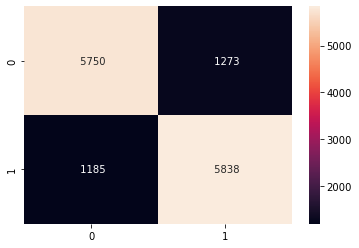

In [313]:
sns.heatmap(confusion_matrix(Y_train_smote,y_train_predict_bagging),annot=True,fmt='5g');

AUC: 0.906


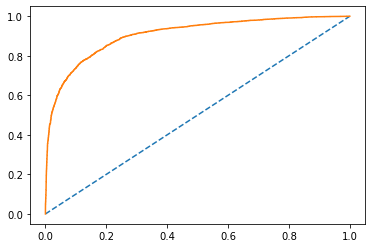

In [314]:
probs=Bagging_model.predict_proba(X_train_smote)
probs=probs[:,1]
auc_bagging_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_bagging_train)
train_fpr_bagging,train_tpr_bagging,train_thershold_bagging=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_bagging,train_tpr_bagging);

Test

In [315]:
bag_test_smote = Bagging_model.score(X_test,Y_test)
bag_test_smote

0.8003552397868561

In [316]:
print(classification_report(Y_test,y_test_predict_bagging));

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2341
           1       0.44      0.69      0.54       474

    accuracy                           0.80      2815
   macro avg       0.69      0.76      0.71      2815
weighted avg       0.85      0.80      0.82      2815



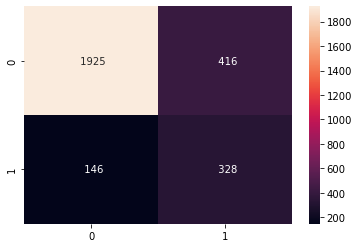

In [317]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_bagging),annot=True,fmt='5g');

AUC: 0.839


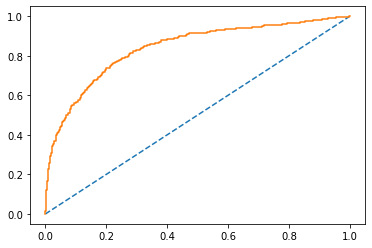

In [318]:
probs=Bagging_model.predict_proba(X_test)
probs=probs[:,1]
auc_bagging_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_bagging_test)
test_fpr_bagging,test_tpr_bagging,test_thershold_bagging=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_bagging,test_tpr_bagging);

# ADA Boosting

In [320]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),n_estimators=100,random_state=1)
ADB_model.fit(X_train_smote,Y_train_smote)

y_train_predict_adb = ADB_model.predict(X_train_smote)
y_test_predict_adb = ADB_model.predict(X_test)

Performance Metric

Train

In [321]:
score_boost_train_smote = ADB_model.score(X_train_smote,Y_train_smote)
score_boost_train_smote

1.0

In [322]:
print(classification_report(Y_train_smote,y_train_predict_adb));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



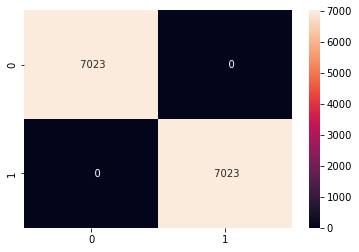

In [323]:
sns.heatmap(confusion_matrix(Y_train_smote,y_train_predict_adb),annot=True,fmt='5g');

AUC: 1.000


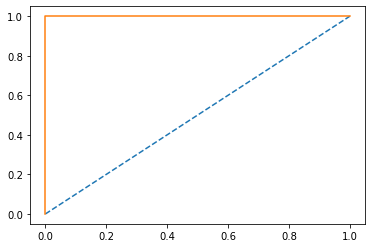

In [324]:
probs=ADB_model.predict_proba(X_train_smote)
probs=probs[:,1]
auc_adb_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_adb_train)
train_fpr_adb,train_tpr_adb,train_thershold_adb=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_adb,train_tpr_adb);

Test

In [325]:
score_boost_test_smote = ADB_model.score(X_test,Y_test)
score_boost_test_smote

0.9207815275310834

In [326]:
print(classification_report(Y_test,y_test_predict_adb));

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2341
           1       0.75      0.80      0.77       474

    accuracy                           0.92      2815
   macro avg       0.85      0.87      0.86      2815
weighted avg       0.92      0.92      0.92      2815



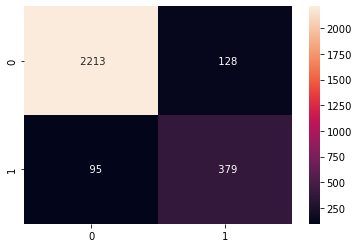

In [327]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_adb),annot=True,fmt='5g');

AUC: 0.872


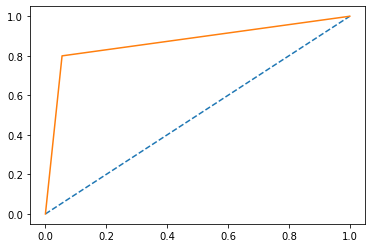

In [328]:
probs=ADB_model.predict_proba(X_test)
probs=probs[:,1]
auc_adb_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_adb_test)
test_fpr_adb,test_tpr_adb,test_thershold_adb=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_adb,test_tpr_adb);

                              Important
Tenure                         0.402171
cashback                       0.052773
CC_Agent_Score                 0.048146
Marital_Status_Married         0.045221
Day_Since_CC_connect           0.043597
rev_growth_yoy                 0.042113
Payment_Credit_Card            0.040709
rev_per_month                  0.040400
CC_Contacted_LY                0.040070
Complain_ly_Yes/No             0.034030
Payment_Debit_Card             0.029910
Login_Device_Mobile            0.028023
account_segment_Super          0.024978
Payment_UPI                    0.020974
Gender_Male                    0.017182
Account_user_count             0.016973
City_Tier                      0.016644
Service_Score                  0.013342
Marital_Status_Single          0.010106
account_segment_Regular_Plus   0.009443
Payment_E_wallet               0.009267
coupon_used_for_payment        0.008042
account_segment_Super_Plus     0.004904
account_segment_Regular        0.000982


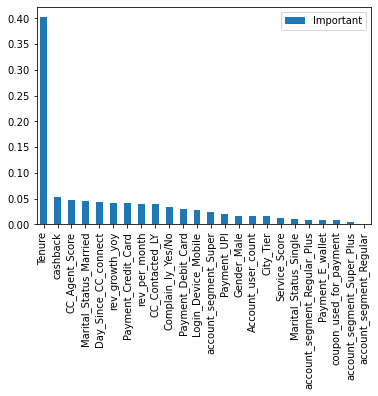

In [329]:
pd.DataFrame(ADB_model.feature_importances_, columns = ["Important"], 
                    index = X_train_smote.columns).sort_values('Important',ascending=False).plot(kind='bar');
print(pd.DataFrame(ADB_model.feature_importances_, columns = ["Important"], 
                    index = X_train_smote.columns).sort_values('Important',ascending=False))

# Gradient Boosting

In [330]:
gbcl = gbcl.fit(X_train_smote, Y_train_smote)

y_train_predict_gbcl = gbcl.predict(X_train_smote)
y_test_predict_gbcl = gbcl.predict(X_test)

Performance metrics

Train data

In [331]:
score_gbc_train_smote = gbcl.score(X_train_smote,Y_train_smote)
score_gbc_train_smote

0.9038160330343158

In [332]:
print(classification_report(Y_train_smote,y_train_predict_gbcl));

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7023
           1       0.90      0.90      0.90      7023

    accuracy                           0.90     14046
   macro avg       0.90      0.90      0.90     14046
weighted avg       0.90      0.90      0.90     14046



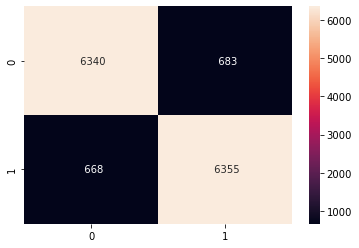

In [333]:
sns.heatmap(confusion_matrix(Y_train_smote,y_train_predict_gbcl),annot=True,fmt='5g');

AUC: 0.966


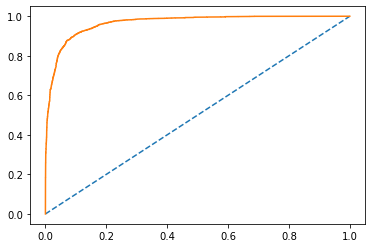

In [334]:
probs=gbcl.predict_proba(X_train_smote)
probs=probs[:,1]
auc_gbcl_train=roc_auc_score(Y_train_smote,probs)
print('AUC: %.3f' %auc_gbcl_train)
train_fpr_gbcl,train_tpr_gbcl,train_thershold_gbcl=roc_curve(Y_train_smote,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_gbcl,train_tpr_gbcl);

Test

In [335]:
score_gbc_test_smote = gbcl.score(X_test,Y_test)
score_gbc_test_smote

0.8849023090586146

In [336]:
print(classification_report(Y_test,y_test_predict_gbcl));

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2341
           1       0.63      0.76      0.69       474

    accuracy                           0.88      2815
   macro avg       0.79      0.84      0.81      2815
weighted avg       0.90      0.88      0.89      2815



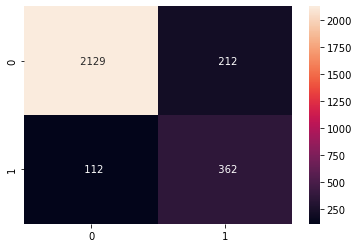

In [337]:
sns.heatmap(confusion_matrix(Y_test,y_test_predict_gbcl),annot=True,fmt='5g');

AUC: 0.917


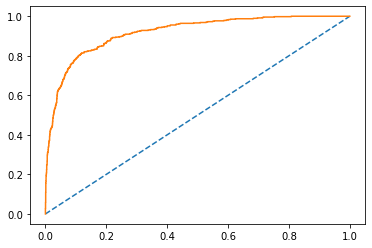

In [338]:
probs=gbcl.predict_proba(X_test)
probs=probs[:,1]
auc_gbcl_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_gbcl_test)
test_fpr_gbcl,test_tpr_gbcl,test_thershold_gbcl=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_gbcl,test_tpr_gbcl);

# Final Model

In [339]:
train_scores=[0.83,0.81,0.84,1.00,0.87,0.75,0.76,1.00,0.87,1.00,1.00,0.83,1.00,0.90]
test_scores=[0.81,0.79,0.82,0.92,0.85,0.67,0.69,0.97,0.87,0.97,0.98,0.80,0.92,0.88]
recall_train=[0.83,0.83,0.83,1.00,0.87,0.84,0.84,1.00,0.86,1.00,1.00,0.83,1.00,0.90]
recall_test=[0.70,0.79,0.70,0.82,0.72,0.70,0.72,0.87,0.75,0.92,0.97,0.69,0.80,0.76]
precision_train=[0.82,0.80,0.84,1.00,0.87,0.71,0.72,1.00,0.88,1.00,0.99,0.82,1.00,0.90]
precision_test=[0.45,0.44,0.47,0.75,0.55,0.29,0.31,0.93,0.59,0.91,0.92,0.44,0.75,0.63]
f1score_train=[0.83,0.81,0.84,1.00,0.87,0.77,0.78,1.00,0.87,1.00,1.00,0.83,1.00,0.90]
f1score_test=[0.55,0.56,0.56,0.78,0.62,0.41,0.44,0.90,0.66,0.92,0.95,0.54,0.77,0.69]
auc_train=[0.907,0.887,0.918,1.000,0.946,0.839,0.847,0.946,0.953,1.000,1.000,0.906,1.000,0.966]
auc_test=[0.841,0.873,0.842,0.883,0.886,0.748,0.774,0.988,0.902,0.990,0.994,0.839,0.872,0.917]
performance_comp=(pd.DataFrame({'Train_Accuracy': train_scores,'Test_Accuracy': test_scores,'Train_Recall':recall_train,'Test_Recall': recall_test,'Train_precision':precision_train,'Test_precision': precision_test,'Train_f1':f1score_train,'Test_f1': f1score_test,'Train_AUC':auc_train,'Test_AUC': auc_test},
            index=['LogisticRegression','Regularization_LGR','LinearDiscriminantAnalysis','DecisionTree','Grid_DecisionTree','NaiveBayes','Grid_NaiveBayes','RandomForest','Grid_RandomForest','ANN','KNN','Bagging','ADABoosting','GradientBoosting']))

#performance_comp.iloc[0:7,:].T 
performance_comp

Train_Accuracy  Test_Accuracy  Train_Recall  \
LogisticRegression                    0.83           0.81          0.83   
Regularization_LGR                    0.81           0.79          0.83   
LinearDiscriminantAnalysis            0.84           0.82          0.83   
DecisionTree                          1.00           0.92          1.00   
Grid_DecisionTree                     0.87           0.85          0.87   
NaiveBayes                            0.75           0.67          0.84   
Grid_NaiveBayes                       0.76           0.69          0.84   
RandomForest                          1.00           0.97          1.00   
Grid_RandomForest                     0.87           0.87          0.86   
ANN                                   1.00           0.97          1.00   
KNN                                   1.00           0.98          1.00   
Bagging                               0.83           0.80          0.83   
ADABoosting                           1.00           0.92          1.00   
GradientBoosting                      0.90           0.88          0.90   

                            Test_Recall  Train_precision  Test_precision  \
LogisticRegression                 0.70             0.82            0.45   
Regularization_LGR                 0.79             0.80            0.44   
LinearDiscriminantAnalysis         0.70             0.84            0.47   
DecisionTree                       0.82             1.00            0.75   
Grid_DecisionTree                  0.72             0.87            0.55   
NaiveBayes                         0.70             0.71            0.29   
Grid_NaiveBayes                    0.72             0.72            0.31   
RandomForest                       0.87             1.00            0.93   
Grid_RandomForest                  0.75             0.88            0.59   
ANN                                0.92             1.00            0.91   
KNN                                0.97             0.99            0.92   
Bagging                            0.69             0.82            0.44   
ADABoosting                        0.80             1.00            0.75   
GradientBoosting                   0.76             0.90            0.63   

                            Train_f1  Test_f1  Train_AUC  Test_AUC  
LogisticRegression              0.83     0.55      0.907     0.841  
Regularization_LGR              0.81     0.56      0.887     0.873  
LinearDiscriminantAnalysis      0.84     0.56      0.918     0.842  
DecisionTree                    1.00     0.78      1.000     0.883  
Grid_DecisionTree               0.87     0.62      0.946     0.886  
NaiveBayes                      0.77     0.41      0.839     0.748  
Grid_NaiveBayes                 0.78     0.44      0.847     0.774  
RandomForest                    1.00     0.90      0.946     0.988  
Grid_RandomForest               0.87     0.66      0.953     0.902  
ANN                             1.00     0.92      1.000     0.990  
KNN                             1.00     0.95      1.000     0.994  
Bagging                         0.83     0.54      0.906     0.839  
ADABoosting                     1.00     0.77      1.000     0.872  
GradientBoosting                0.90     0.69      0.966     0.917

# Feature Importance

In [340]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.295081
         Iterations 8
                               Results: Logit
Model:                   Logit                Pseudo R-squared:     0.349    
Dependent Variable:      Churn                AIC:                  6693.2173
Date:                    2022-05-31 21:42     BIC:                  6869.1135
No. Observations:        11260                Log-Likelihood:       -3322.6  
Df Model:                23                   LL-Null:              -5104.3  
Df Residuals:            11236                LLR p-value:          0.0000   
Converged:               1.0000               Scale:                1.0000   
No. Iterations:          8.0000                                              
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------

# Business Insights from EDA

**Balance check on the data:**

Unbalanced data set means when the target variable does not have balanced count in each observations.


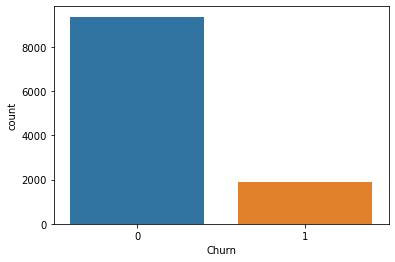

In [71]:
sns.countplot(x=df_final['Churn']);

In [72]:
df_final['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

We need to apply smote test either doing  over sampling or under sampling to make the data balanced. Which we wil be doing during Model building.

**Clustering**

As we can see that the KMeans algorithm is based on the distance between points, categorical data doesn’t fit the model well. We can convert the categorical data into 0 and ones, but it won’t add any meaningful value to an algorithm with works on the distance between points. Hence, we will drop all the fields having 0 and 1 values.

In [21]:
df_cluster=df_final.drop(['account_segment_Regular','account_segment_Regular_Plus','account_segment_Super','account_segment_Super_Plus',
                          'Gender_Male','Payment_Debit_Card','Payment_E_wallet','Payment_UPI',
                          'Payment_Credit_Card','Login_Device_Mobile','Marital_Status_Married','Marital_Status_Single','Complain_ly_Yes/No'],axis=1).copy()

In [22]:
num = ['Tenure', 'Account_user_count','rev_per_month','rev_growth_yoy','Day_Since_CC_connect',
       'CC_Contacted_LY','coupon_used_for_payment']

for variable in num:
    df_cluster[variable] = df_cluster[variable].astype('int64')

In [91]:
df_cluster.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0      1       4          2                6              3   
1      1       0          0                8              3   
2      1       0          0               30              2   
3      1       0          2               15              2   
4      1       0          0               12              2   

   Account_user_count  CC_Agent_Score  rev_per_month  rev_growth_yoy  \
0                   3               1              9              11   
1                   4               2              7              15   
2                   4               2              6              14   
3                   4               4              8              23   
4                   3               4              3              11   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  
0                        1                     5    159.93  
1                        0                     0    120.90  
2                        0                     3    165.25  
3                        0                     3    134.07  
4                        1                     3    129.60

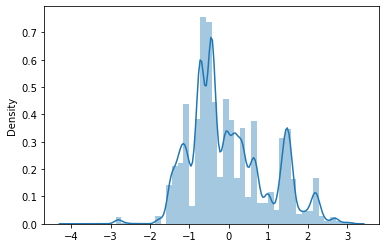

In [29]:
from scipy.stats import zscore
df_scaled= df_cluster.apply(zscore)
sns.distplot(df_scaled)

Text(0.5, 1.0, 'Elbow Curve')

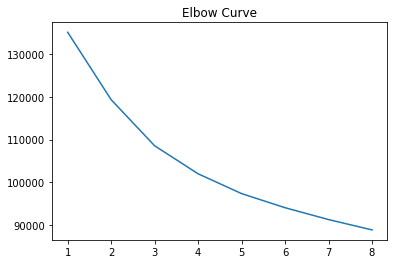

In [30]:
from sklearn.cluster import KMeans

wss = []

for i in range(1,9):
    KM= KMeans(n_clusters = i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
plt.plot(range(1,9), wss)
plt.title('Elbow Curve')

In [31]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
labels = k_means.labels_

K_cluster = df_cluster.copy()
K_cluster['KM_Cluster_Group'] = labels

In [26]:
K_cluster.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0      1       4          2                6              3   
1      1       0          0                8              3   
2      1       0          0               30              2   
3      1       0          2               15              2   
4      1       0          0               12              2   

   Account_user_count  CC_Agent_Score  rev_per_month  rev_growth_yoy  \
0                   3               1              9              11   
1                   4               2              7              15   
2                   4               2              6              14   
3                   4               4              8              23   
4                   3               4              3              11   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  KM_Cluster_Group  
0                        1                     5    159.93                 0  
1                        0                     0    120.90                 0  
2                        0                     3    165.25                 0  
3                        0                     3    134.07                 0  
4                        1                     3    129.60                 0

In [32]:
K_cluster['KM_Cluster_Group'].value_counts().sort_values(ascending=False)

1    4877
0    4559
2    1824
Name: KM_Cluster_Group, dtype: int64

**Business Insights from Clustering**

In [33]:
K_mean_cluster = pd.DataFrame(round(K_cluster.groupby('KM_Cluster_Group').mean(),1))
K_mean_cluster

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
KM_Cluster_Group                                                             
0                   0.0     8.9        0.6             16.7            2.5   
1                   0.0    14.2        0.7             18.2            3.3   
2                   1.0     3.0        0.8             19.4            2.9   

                  Account_user_count  CC_Agent_Score  rev_per_month  \
KM_Cluster_Group                                                      
0                                3.2             1.9            4.5   
1                                4.0             2.1            5.9   
2                                3.9             2.4            5.5   

                  rev_growth_yoy  coupon_used_for_payment  \
KM_Cluster_Group                                            
0                           15.7                      0.8   
1                           16.7                      2.0   
2                           16.1                      1.3   

                  Day_Since_CC_connect  cashback  
KM_Cluster_Group                                  
0                                  3.4     157.5  
1                                  6.1     202.2  
2                                  3.1     160.0

•	We see total 3 clusters divided by Not Churned (Not Churned having more activity (1) and another group having less activity(0)) and Fully Churned (2).

•	Cluster  “1” is  classified as not churned customers with more activity (Important people)

	They are having highest account tenure with average of 14.3

	They have given average of highest service score to the company service.

	Average number of user per account is also highest of 4.0.

	They are having highest revenue both month and year wise.

	Recent customer connection record is also high for this group including average cashback is also high. Which states they are having continue activity.

	More number of customer is also belonged to this cluster group. So it is a good sign to company.

•	Cluster 0 is classified as not churned having less activity (Danger Space)

	They have given lowest agent score and customer care score.

	Average revenue per month and year is the lowest.

	Average count of customer connection is also lowest.

	Number of user associated in one account for this group is also lowest.

	By looking into the activity, these group of customers are having less activity and not much beneficial to the company and there is high risk to lose them. Therefore company must take reviews, provide great offers/discounts, free delivery, coupons to attract them.

•	Cluster 2 has churned customers (Beneficial to detect and rescue using past data)

	They are having lowest number of tenure in the company service. So the tenure between 0-1 is very important, as in this time only more churning happens. Company must provide some discount on frequently used products and free delivery for the newly joined customers.

	They have contacted customer care more number of time having average of 18.3

	Their most recent customer care connection is showing average of 3.1, while others are more. Because they leave in 0-1 years of account span, that’s why customer connection days average value is less.

	Around 1825 customers belong to this group but their City_Tier average value is showing more, this means probably more number of customers belong to Tier 3(small cities) in this group (As tire 3 having value 3 so average value also will calculate more)
